In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

# Read Data

In [3]:
data_train = pd.read_csv("./NSL-KDD/KDDTest-21.txt")

# Information About Data

In [4]:
len(data_train)

11849

In [5]:
data_train.shape

(11849, 43)

In [6]:
data_train.head(5)

,13,tcp,telnet,SF,118,2425,0,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,26,10,0.38,0.12,0.04,0.00.6,0.00.7,0.00.8,0.12.1,0.30,guess_passwd,2
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,back,10


# Initialize Columns(Rename each column)

In [7]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [8]:
data_train.columns = columns

# Information about Columns

In [9]:
data_train['flag'].unique()

array(['SF', 'S3', 'SH', 'REJ', 'S0', 'RSTO', 'RSTR', 'RSTOS0', 'S1',
       'S2', 'OTH'], dtype=object)

In [10]:
data_train['outcome'].unique()

array(['snmpguess', 'processtable', 'normal', 'nmap', 'back', 'neptune',
       'satan', 'saint', 'mscan', 'apache2', 'httptunnel', 'guess_passwd',
       'warezmaster', 'ipsweep', 'smurf', 'mailbomb', 'teardrop',
       'portsweep', 'snmpgetattack', 'multihop', 'worm', 'land',
       'sendmail', 'buffer_overflow', 'pod', 'rootkit', 'xlock', 'xterm',
       'xsnoop', 'ps', 'named', 'ftp_write', 'loadmodule', 'phf',
       'udpstorm', 'perl', 'sqlattack', 'imap'], dtype=object)

In [11]:
data_train['level'].unique()

array([12, 18, 17, 10, 19, 20, 11, 16, 14, 15,  6,  9,  7, 13,  5,  3,  4,
        8,  0,  1,  2], dtype=int64)

In [12]:
data_train['flag'].value_counts()

flag
SF        7277
REJ       1852
S0        1033
RSTR       668
RSTO       658
S3         249
SH          73
S1          18
S2          15
OTH          4
RSTOS0       2
Name: count, dtype: int64

In [13]:
data_train['outcome'].value_counts()

outcome
normal             2152
neptune            1579
guess_passwd       1230
mscan               996
warezmaster         944
apache2             737
satan               727
processtable        685
smurf               627
back                359
snmpguess           331
saint               309
mailbomb            293
snmpgetattack       178
portsweep           156
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
phf                   2
udpstorm              2
perl                  2
sqlattack             2
imap                  1
Name: count, dtype: int64

In [14]:
data_train['level'].value_counts()

level
18    2967
20    1343
15    1176
17    1168
19     890
14     736
16     681
13     519
12     486
11     461
7      249
10     195
6      157
8      131
0      123
3      116
9      106
5      103
4      101
1       87
2       54
Name: count, dtype: int64

In [15]:
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,back,10


In [16]:
data_train.nunique()

duration                       605
protocol_type                    3
service                         62
flag                            11
src_bytes                      610
dst_bytes                      505
land                             2
wrong_fragment                   3
urgent                           4
hot                             15
num_failed_logins                5
logged_in                        2
num_compromised                 23
root_shell                       2
su_attempted                     3
num_root                        20
num_file_creations               9
num_shells                       4
num_access_files                 5
num_outbound_cmds                1
is_host_login                    2
is_guest_login                   2
count                          495
srv_count                      456
serror_rate                     71
srv_serror_rate                 73
rerror_rate                     74
srv_rerror_rate                 88
same_srv_rate       

In [17]:
data_train.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1288652
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


# Data Preprocessing

In [18]:
# Check Null Values
data_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
# Check Duplicated
data_train.duplicated().sum()

0

In [20]:
# Information about each columns
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11849 entries, 0 to 11848
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11849 non-null  int64  
 1   protocol_type                11849 non-null  object 
 2   service                      11849 non-null  object 
 3   flag                         11849 non-null  object 
 4   src_bytes                    11849 non-null  int64  
 5   dst_bytes                    11849 non-null  int64  
 6   land                         11849 non-null  int64  
 7   wrong_fragment               11849 non-null  int64  
 8   urgent                       11849 non-null  int64  
 9   hot                          11849 non-null  int64  
 10  num_failed_logins            11849 non-null  int64  
 11  logged_in                    11849 non-null  int64  
 12  num_compromised              11849 non-null  int64  
 13  root_shell      

In [21]:
# Check unique attack types before mapping
unique_attacks_before = data_train['outcome'].unique()
print("Unique attack types before mapping:")
print(unique_attacks_before)

# Create a comprehensive dictionary to map attack types to categories
attack_mapping = {
    "normal": "Normal",

    # DoS attacks
    "neptune": "DoS", "teardrop": "DoS", "smurf": "DoS",
    "pod": "DoS", "land": "DoS", "back": "DoS",
    "apache2": "DoS", "mailbomb": "DoS", "processtable": "DoS",
    "udpstorm": "DoS",

    # Probe attacks
    "ipsweep": "Probe", "portsweep": "Probe", "nmap": "Probe",
    "satan": "Probe", "mscan": "Probe", "saint": "Probe",

    # R2L attacks
    "warezclient": "R2L", "guess_passwd": "R2L", "ftp_write": "R2L",
    "multihop": "R2L", "imap": "R2L", "phf": "R2L", "spy": "R2L",
    "warezmaster": "R2L", "snmpgetattack": "R2L", "snmpguess": "R2L",
    "httptunnel": "R2L", "sendmail": "R2L", "named": "R2L",
    "xlock": "R2L", "xsnoop": "R2L", "worm": "R2L",

    # U2R attacks
    "buffer_overflow": "U2R", "rootkit": "U2R", "loadmodule": "U2R",
    "perl": "U2R", "ps": "U2R", "sqlattack": "U2R", "xterm": "U2R",
    "httptunnel": "U2R"
}

# Map the outcome column using the dictionary
data_train['outcome'] = data_train['outcome'].map(attack_mapping)

# Check unique attack types after mapping
unique_attacks_after = data_train['outcome'].unique()
print("Unique attack types after mapping:")
print(unique_attacks_after)

# Identify unmapped attack types
unmapped_attacks = data_train[data_train['outcome'].isna()]['outcome'].unique()
print("Unmapped attack types:")
print(unmapped_attacks)

# Calculate the distribution of samples for each class
class_distribution = data_train['outcome'].value_counts()

# Print the distribution
print("Distribution of samples for each class:")
print(class_distribution)

Unique attack types before mapping:
['snmpguess' 'processtable' 'normal' 'nmap' 'back' 'neptune' 'satan'
 'saint' 'mscan' 'apache2' 'httptunnel' 'guess_passwd' 'warezmaster'
 'ipsweep' 'smurf' 'mailbomb' 'teardrop' 'portsweep' 'snmpgetattack'
 'multihop' 'worm' 'land' 'sendmail' 'buffer_overflow' 'pod' 'rootkit'
 'xlock' 'xterm' 'xsnoop' 'ps' 'named' 'ftp_write' 'loadmodule' 'phf'
 'udpstorm' 'perl' 'sqlattack' 'imap']
Unique attack types after mapping:
['R2L' 'DoS' 'Normal' 'Probe' 'U2R']
Unmapped attack types:
[]
Distribution of samples for each class:
outcome
DoS       4342
R2L       2753
Probe     2402
Normal    2152
U2R        200
Name: count, dtype: int64


In [22]:
data_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.0,0.75,0.5,0.0,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.0,0.0,R2L,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.6,0.0,DoS,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.0,0.0,Normal,17


In [23]:
# Check Outliers
from scipy.stats import zscore
numeric_columns = data_train.select_dtypes(include=[np.number])
z_scores = numeric_columns.apply(zscore)
# Detect outliers
outliers = (z_scores.abs() > 3).sum()
outliers

duration                       486
src_bytes                        6
dst_bytes                       19
land                             7
wrong_fragment                 100
urgent                          10
hot                             45
num_failed_logins              478
logged_in                        0
num_compromised                  8
root_shell                      51
su_attempted                     4
num_root                         7
num_file_creations              16
num_shells                      19
num_access_files                38
num_outbound_cmds                0
is_host_login                   11
is_guest_login                 627
count                            0
srv_count                      582
serror_rate                      0
srv_serror_rate                  0
rerror_rate                      0
srv_rerror_rate                  0
same_srv_rate                    0
diff_srv_rate                    0
srv_diff_host_rate             839
dst_host_count      

# More Preprocessing on the data

In [24]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [25]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [26]:
scaled_train = preprocess(data_train)
print(data_train.shape)
print(scaled_train.shape)

(11849, 43)
(11849, 116)


# Descriptive Statistics

In [27]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
land,11849.0,0.000591,0.024300,0.000000,0.000000,0.0,0.000000,1.000000
logged_in,11849.0,0.253017,0.434759,0.000000,0.000000,0.0,1.000000,1.000000
is_host_login,11849.0,0.000928,0.030456,0.000000,0.000000,0.0,0.000000,1.000000
is_guest_login,11849.0,0.052916,0.223875,0.000000,0.000000,0.0,0.000000,1.000000
level,11849.0,15.327960,4.405964,0.000000,14.000000,17.0,18.000000,20.000000
duration,11849.0,415.473795,1919.519063,0.000000,0.000000,0.0,1.000000,57715.000000
src_bytes,11849.0,121.437958,4075.087553,-0.175000,-0.175000,0.0,0.825000,392660.125000
dst_bytes,11849.0,13.204346,256.957395,0.000000,0.000000,0.0,1.000000,13856.473118
wrong_fragment,11849.0,0.016035,0.196387,0.000000,0.000000,0.0,0.000000,3.000000
urgent,11849.0,0.001350,0.050302,0.000000,0.000000,0.0,0.000000,3.000000


In [28]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,land,logged_in,is_host_login,is_guest_login,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000
mean,0.000591,0.253017,0.000928,0.052916,15.327960,415.473795,121.437958,13.204346,0.016035,0.001350,0.190227,0.041185,0.227699,0.004304,0.000506,0.218077,0.016204,0.002194,0.003882,0.000000,0.695603,3.084896,0.113851,0.114600,0.326591,0.335472,-0.494027,2.619363,0.096770,-41.038737,0.145171,0.010333,2.149816,2.294521,0.024467,10.419023,0.106706,0.435650,0.485010
std,0.024300,0.434759,0.030456,0.223875,4.405964,1919.519063,4075.087553,256.957395,0.196387,0.050302,1.222442,0.205409,10.026197,0.065468,0.029048,11.091406,0.933241,0.066213,0.076767,0.000000,1.171168,7.947877,0.305956,0.309228,0.512338,0.537825,0.798109,5.646207,0.278675,82.189060,0.447745,0.455253,4.812839,4.213399,0.114238,26.509503,0.278559,0.673840,0.775107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.022901,-0.133333,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-254.000000,-0.344538,-0.569892,-0.333333,0.000000,0.000000,0.000000,0.000000,-0.035714,0.000000
25%,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,-0.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015267,-0.066667,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-0.298319,-0.494624,-0.166667,0.000000,0.000000,0.000000,0.000000,-0.035714,0.000000
50%,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000,0.825000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.984733,0.933333,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.701681,0.505376,0.833333,1.000000,0.000000,1.000000,0.000000,0.964286,1.000000
max,1.000000,1.000000,1.000000,1.000000,20.000000,57715.000000,392660.125000,13856.473118,3.000000,3.000000,101.000000,4.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.000000,3.877863,33.933333,1.000000,1.000000,1.190476,1.250000,0.000000,16.666667,1.000000,0.000000,0.722689,0.505376,16.333333,11.111111,1.000000,100.000000,1.000000,1.750000,1.923077


In [29]:
data_train["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.728416
udp     0.188877
icmp    0.082707
Name: proportion, dtype: float64

# Visualization

Distribution Analysis

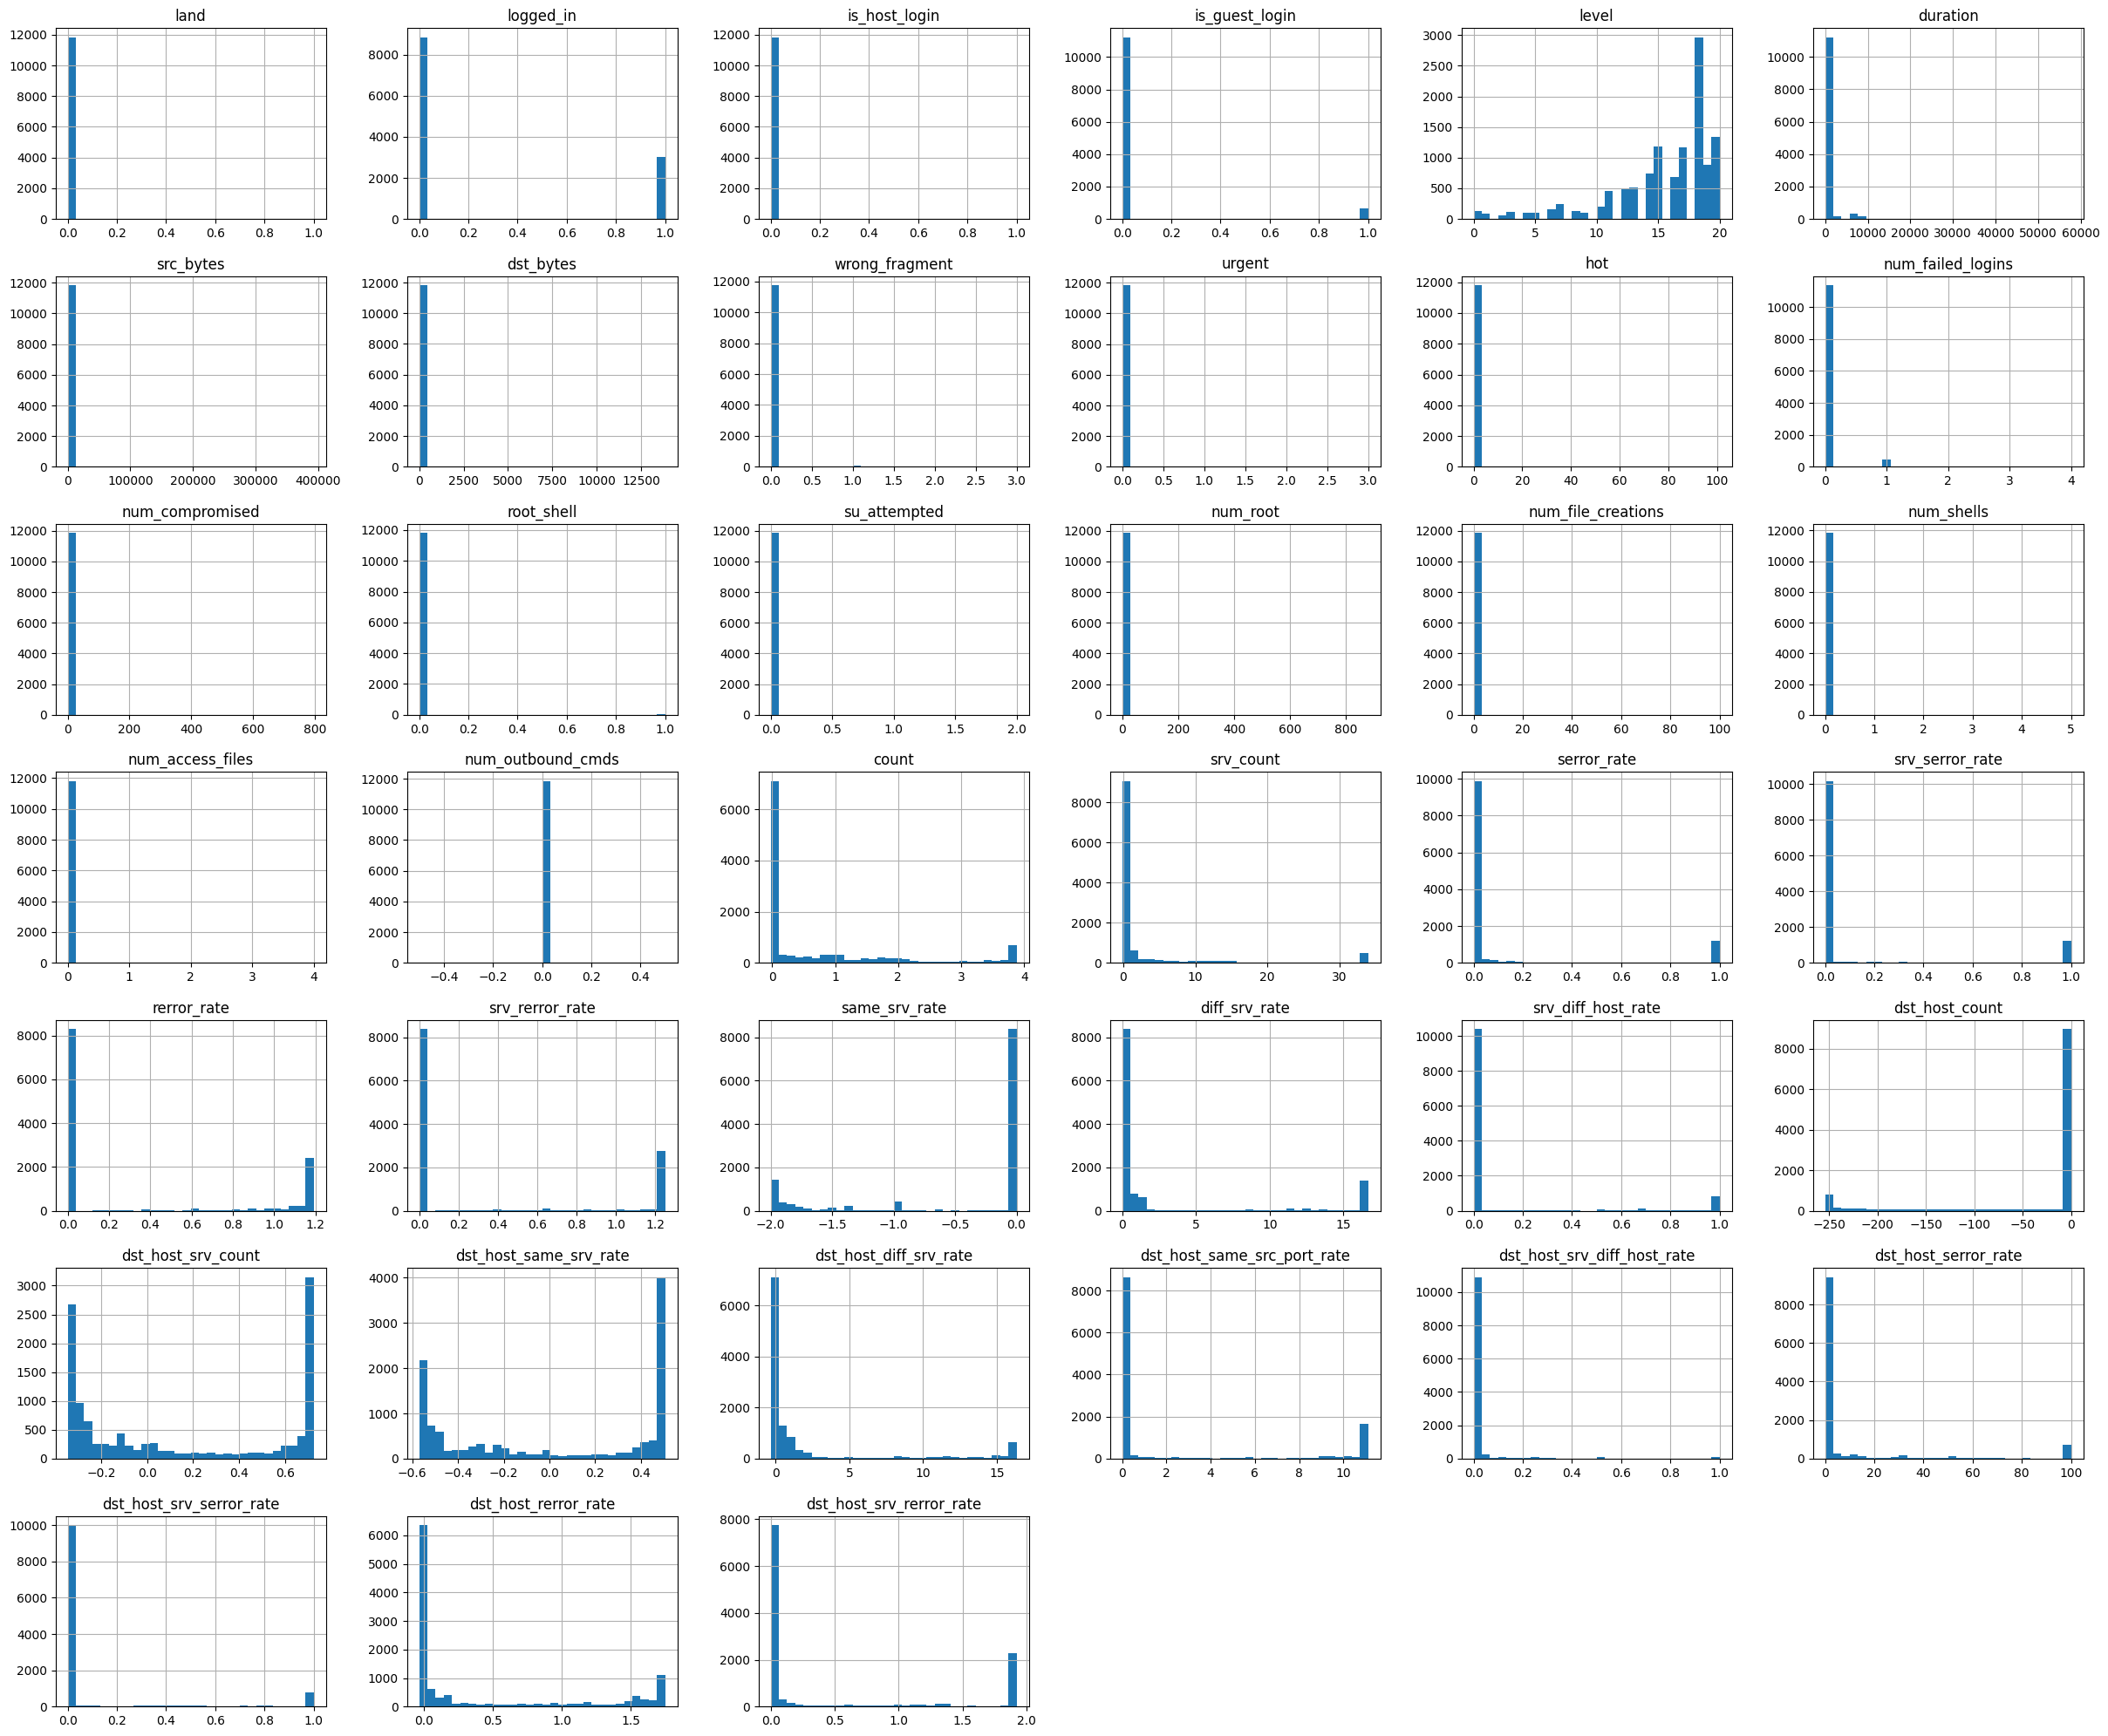

In [30]:
# Histogram
data_train.hist(bins=30, figsize=(30, 25));
plt.show();

<Figure size 2000x4000 with 0 Axes>

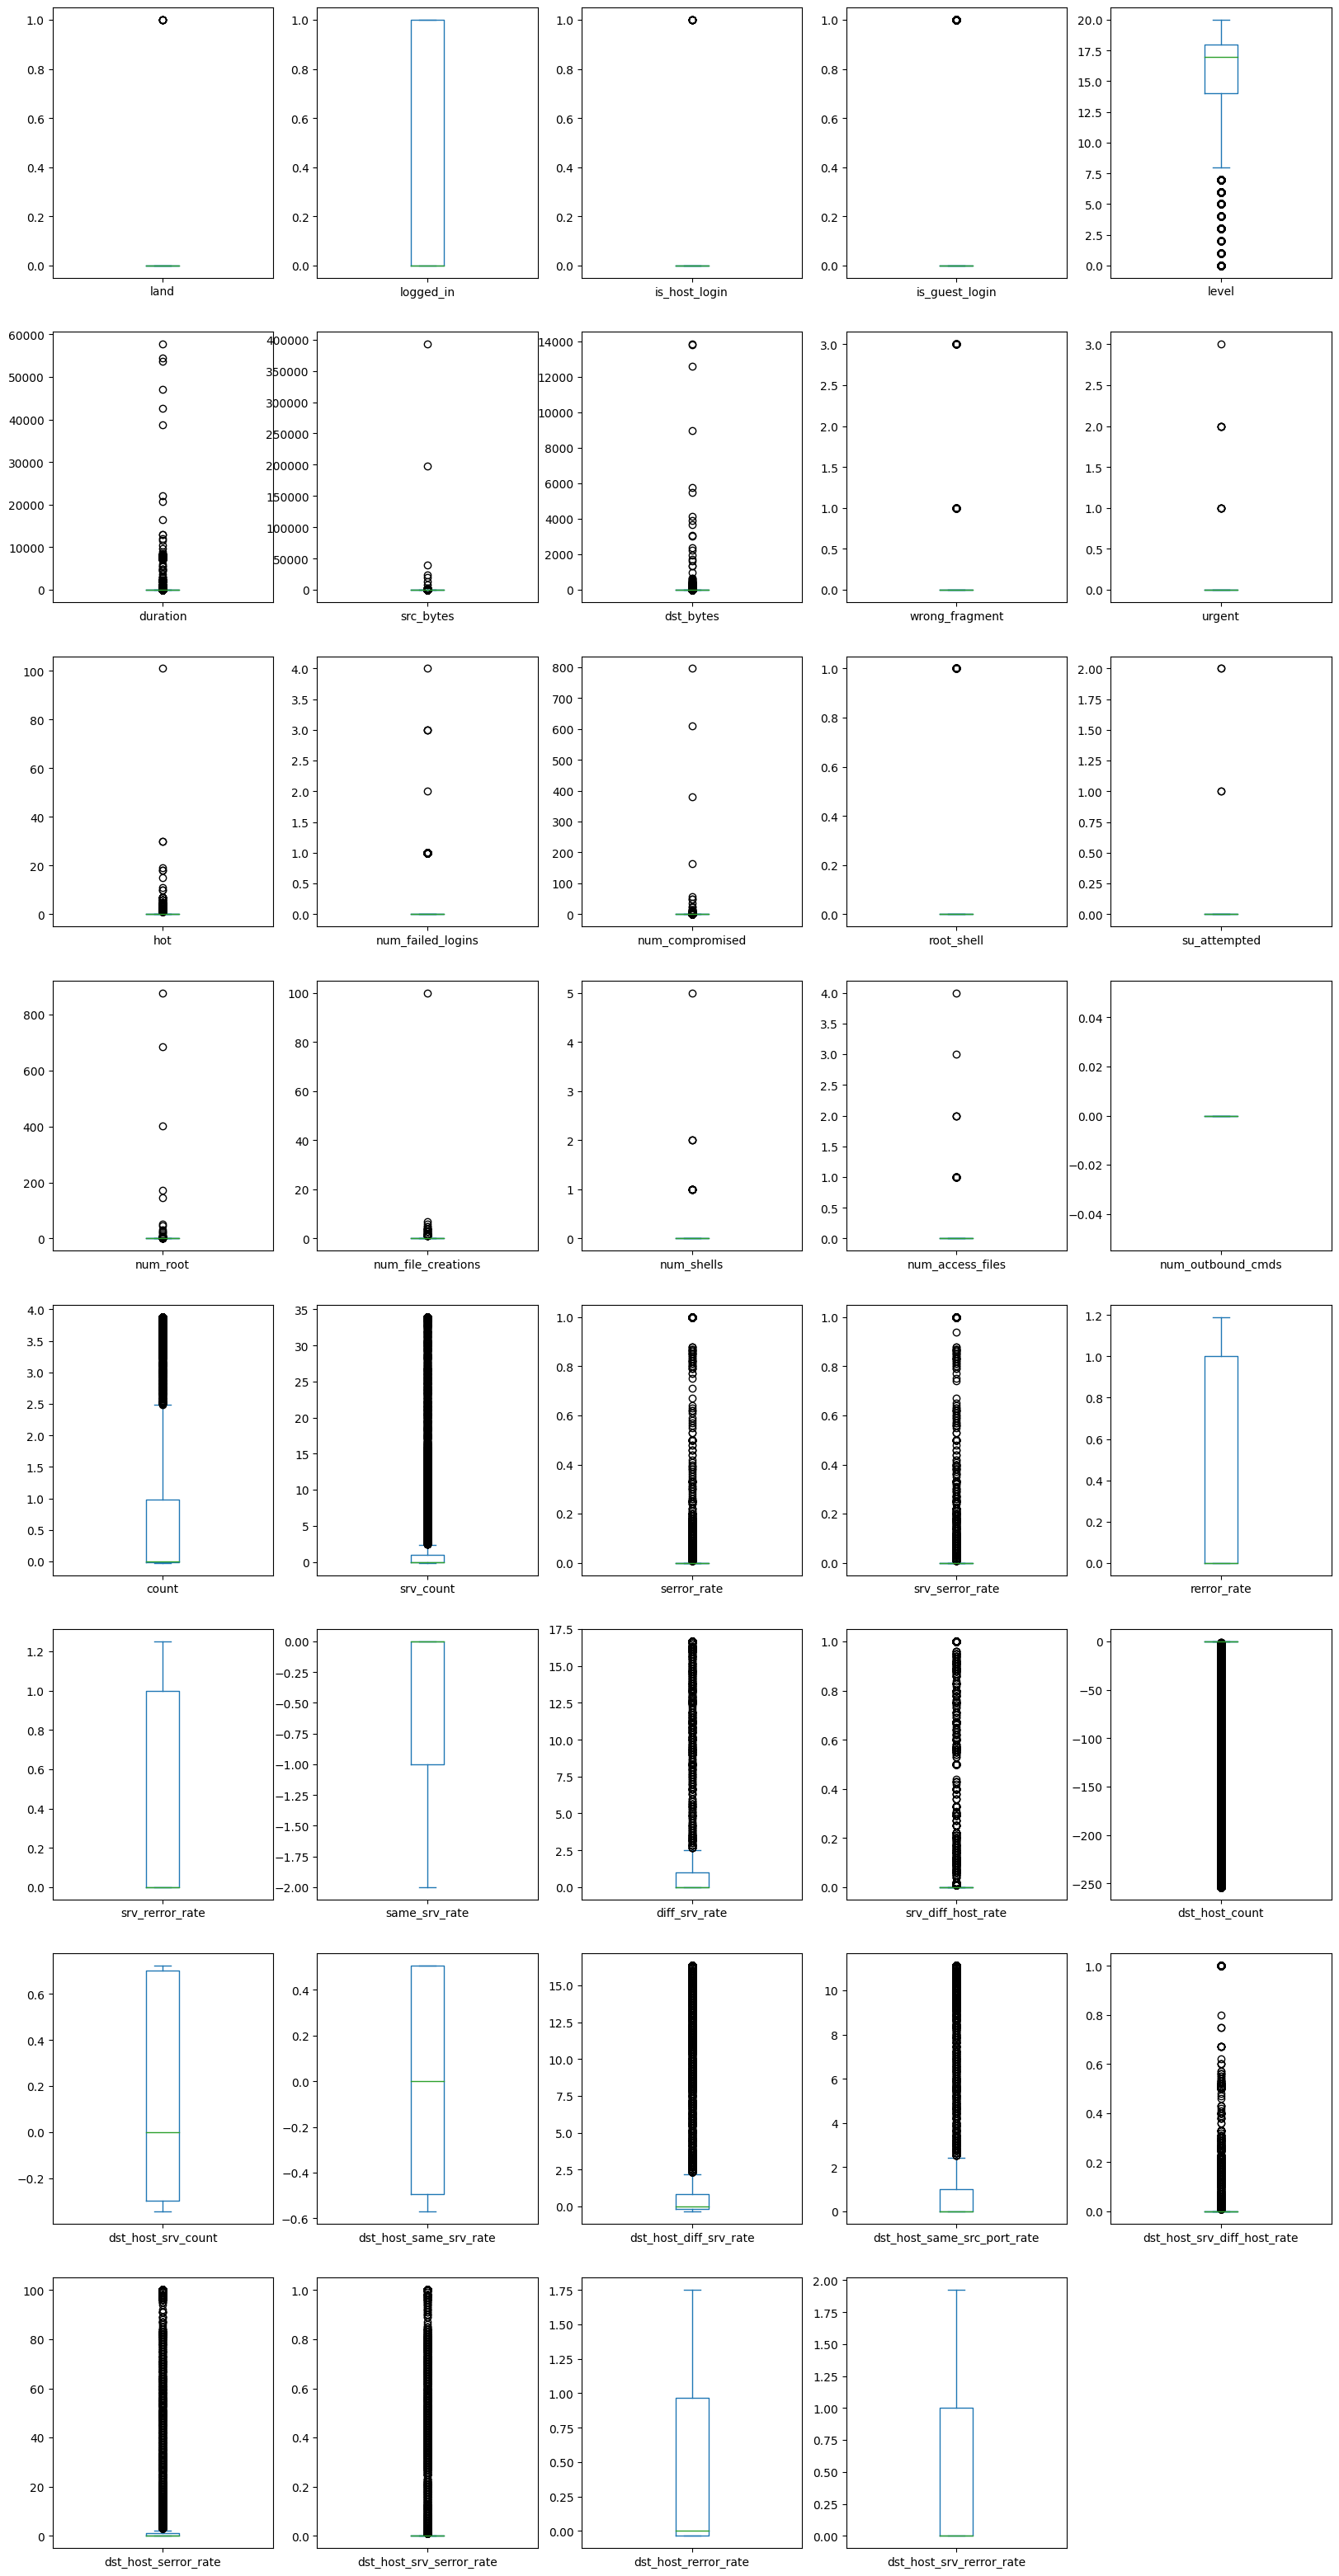

In [31]:
plt.figure(figsize=(20, 40));
data_train.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40));
plt.show();

In [32]:
# Bar Chart Graph
def bar_graph(feature):
    data_train[feature].value_counts().plot(kind="bar")

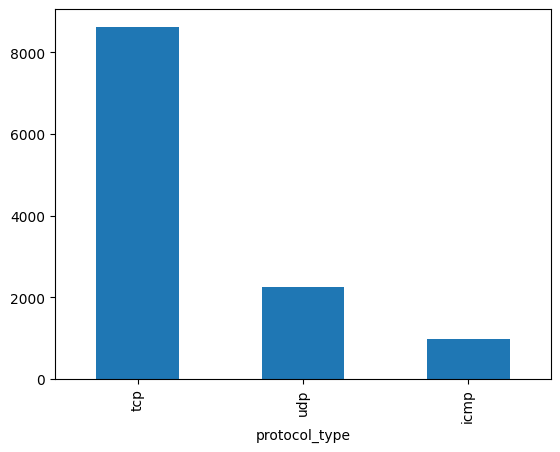

In [33]:
bar_graph('protocol_type')

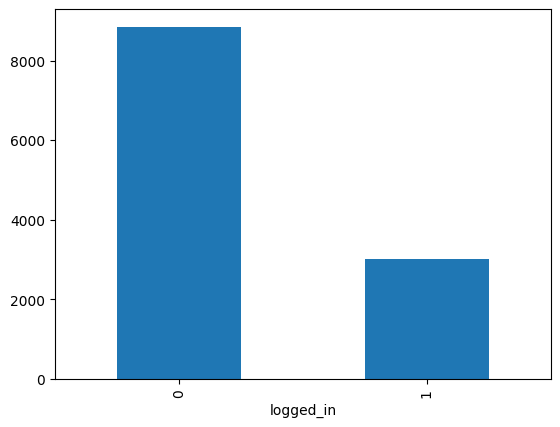

In [34]:
bar_graph('logged_in')
# logged_in (1 if successfully logged in; 0 otherwise): We notice that just 80000 packets are successfully logged in.

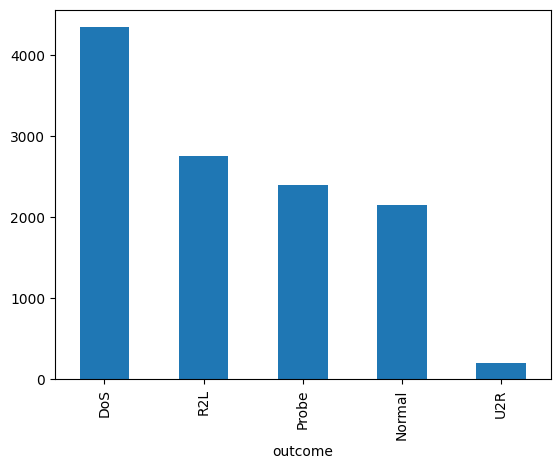

In [35]:
bar_graph('outcome')

In [36]:
# Pie Chart Graph 
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

In [37]:
data_train['outcome'].unique()

array(['R2L', 'DoS', 'Normal', 'Probe', 'U2R'], dtype=object)

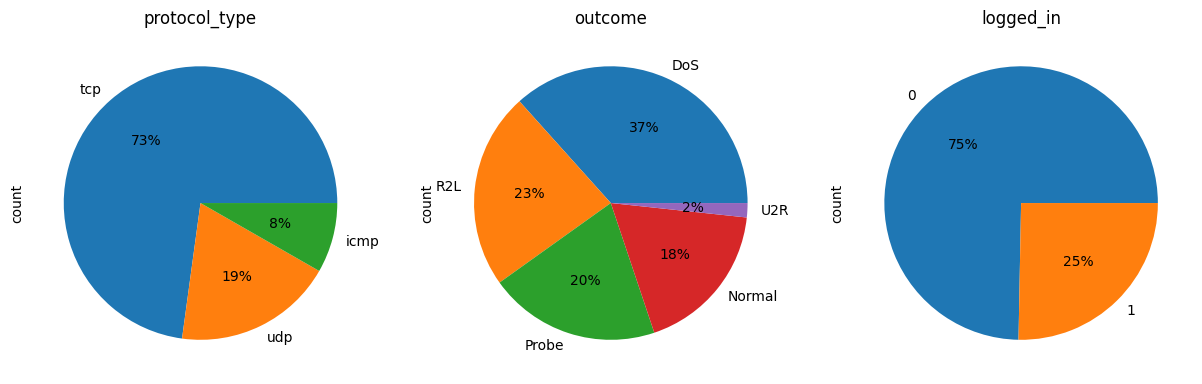

In [38]:
pie_plot(data_train, ['protocol_type', 'outcome', 'logged_in'], 1, 3)

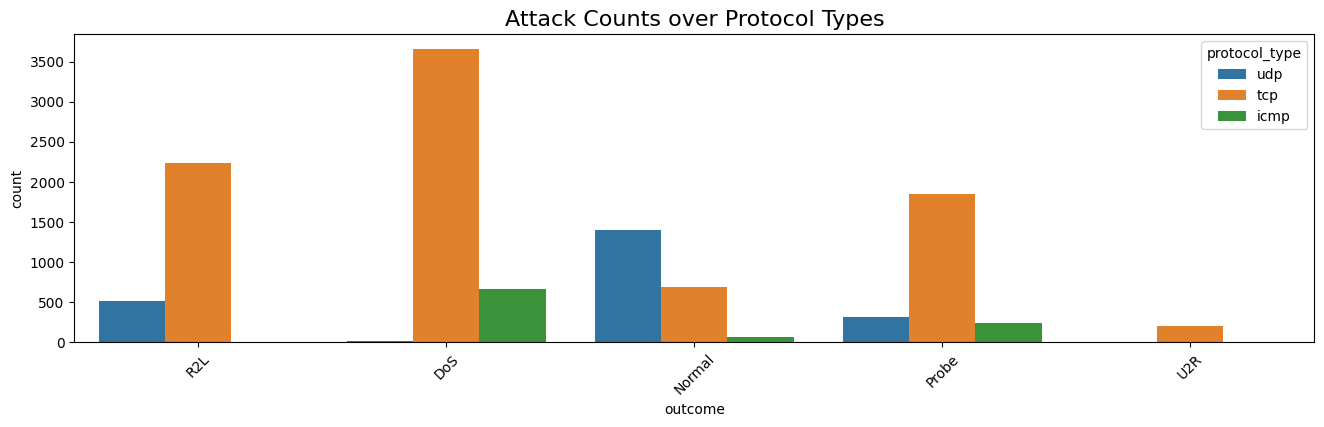

In [39]:
plt.figure(figsize=(16,4))
sns.countplot(x='outcome',data=data_train,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

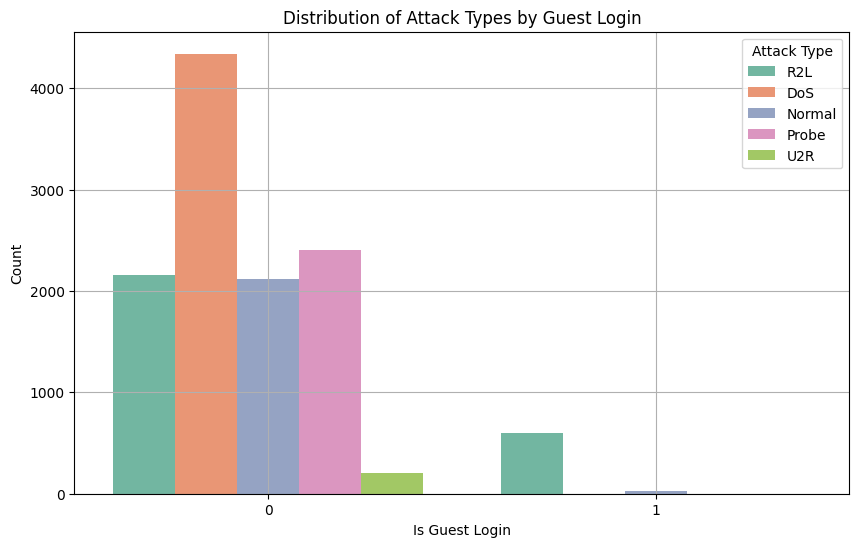

In [40]:
# Distribution of Attack Types by Guest Login
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='outcome', data=data_train, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

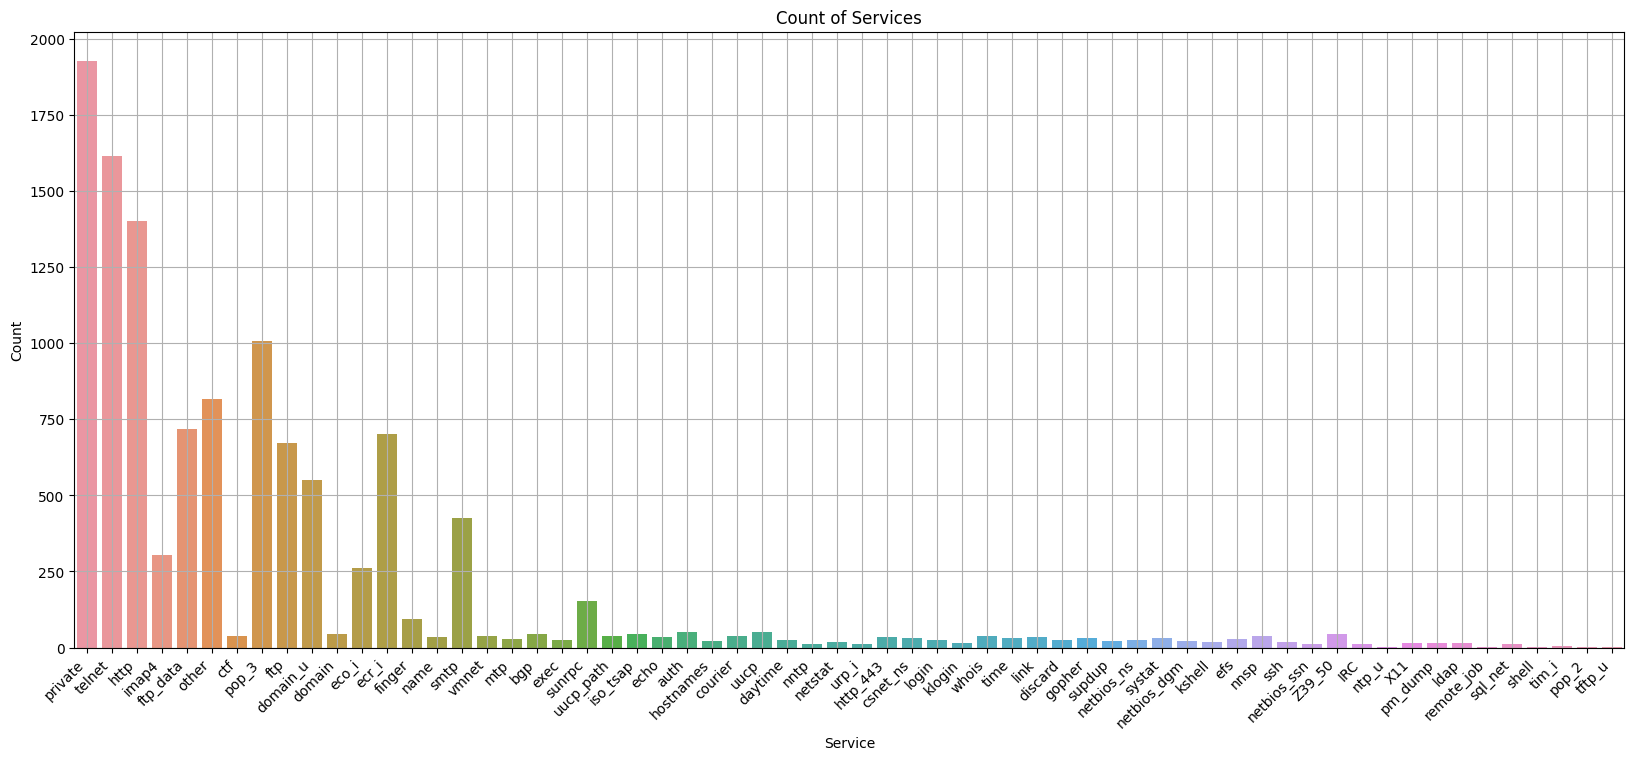

In [41]:
# Service used general
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

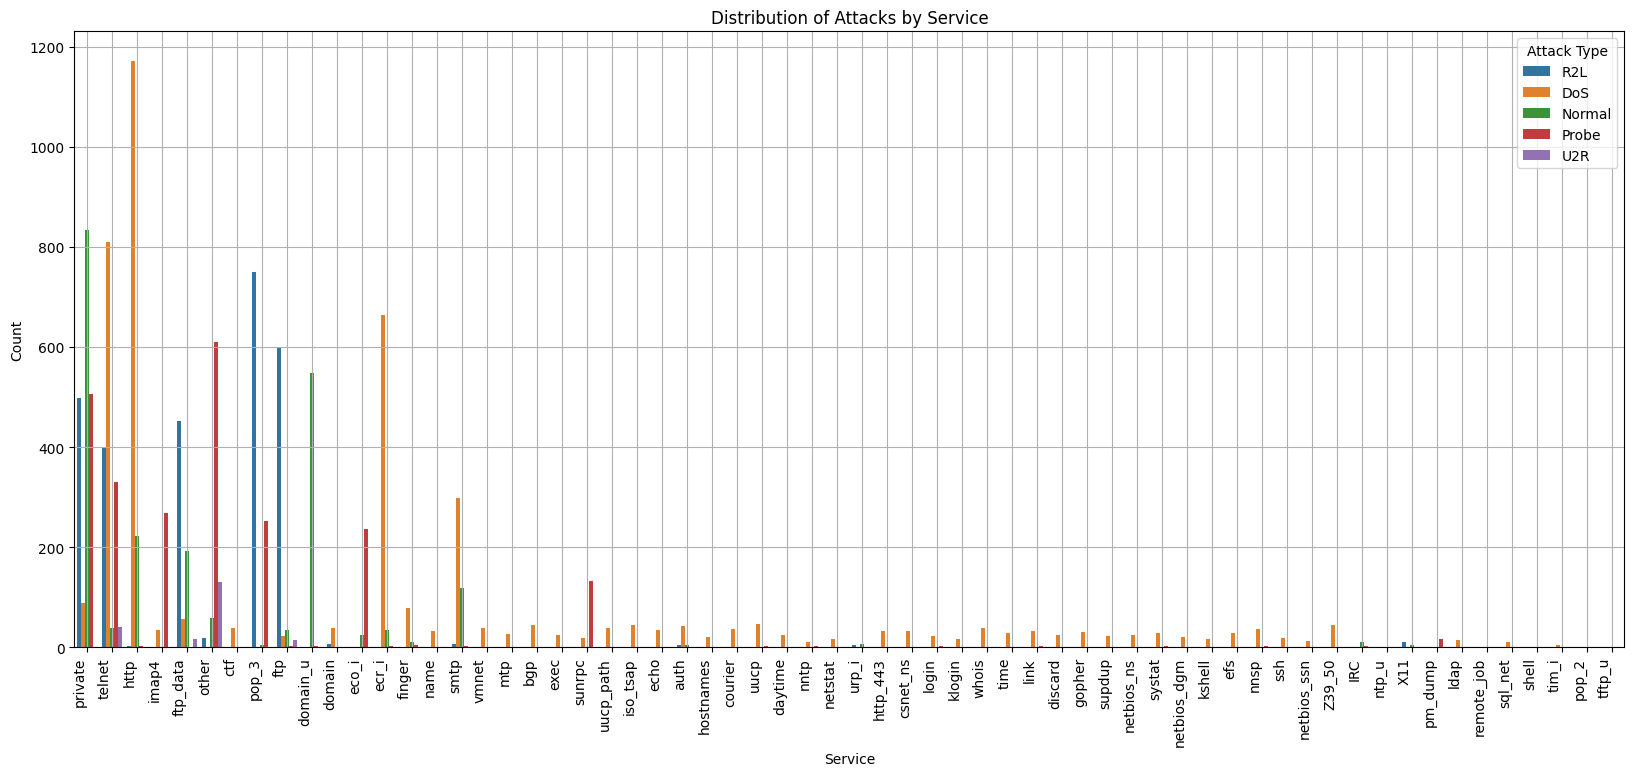

In [42]:
# Service used effect on attacks
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='outcome', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# Data Correlation

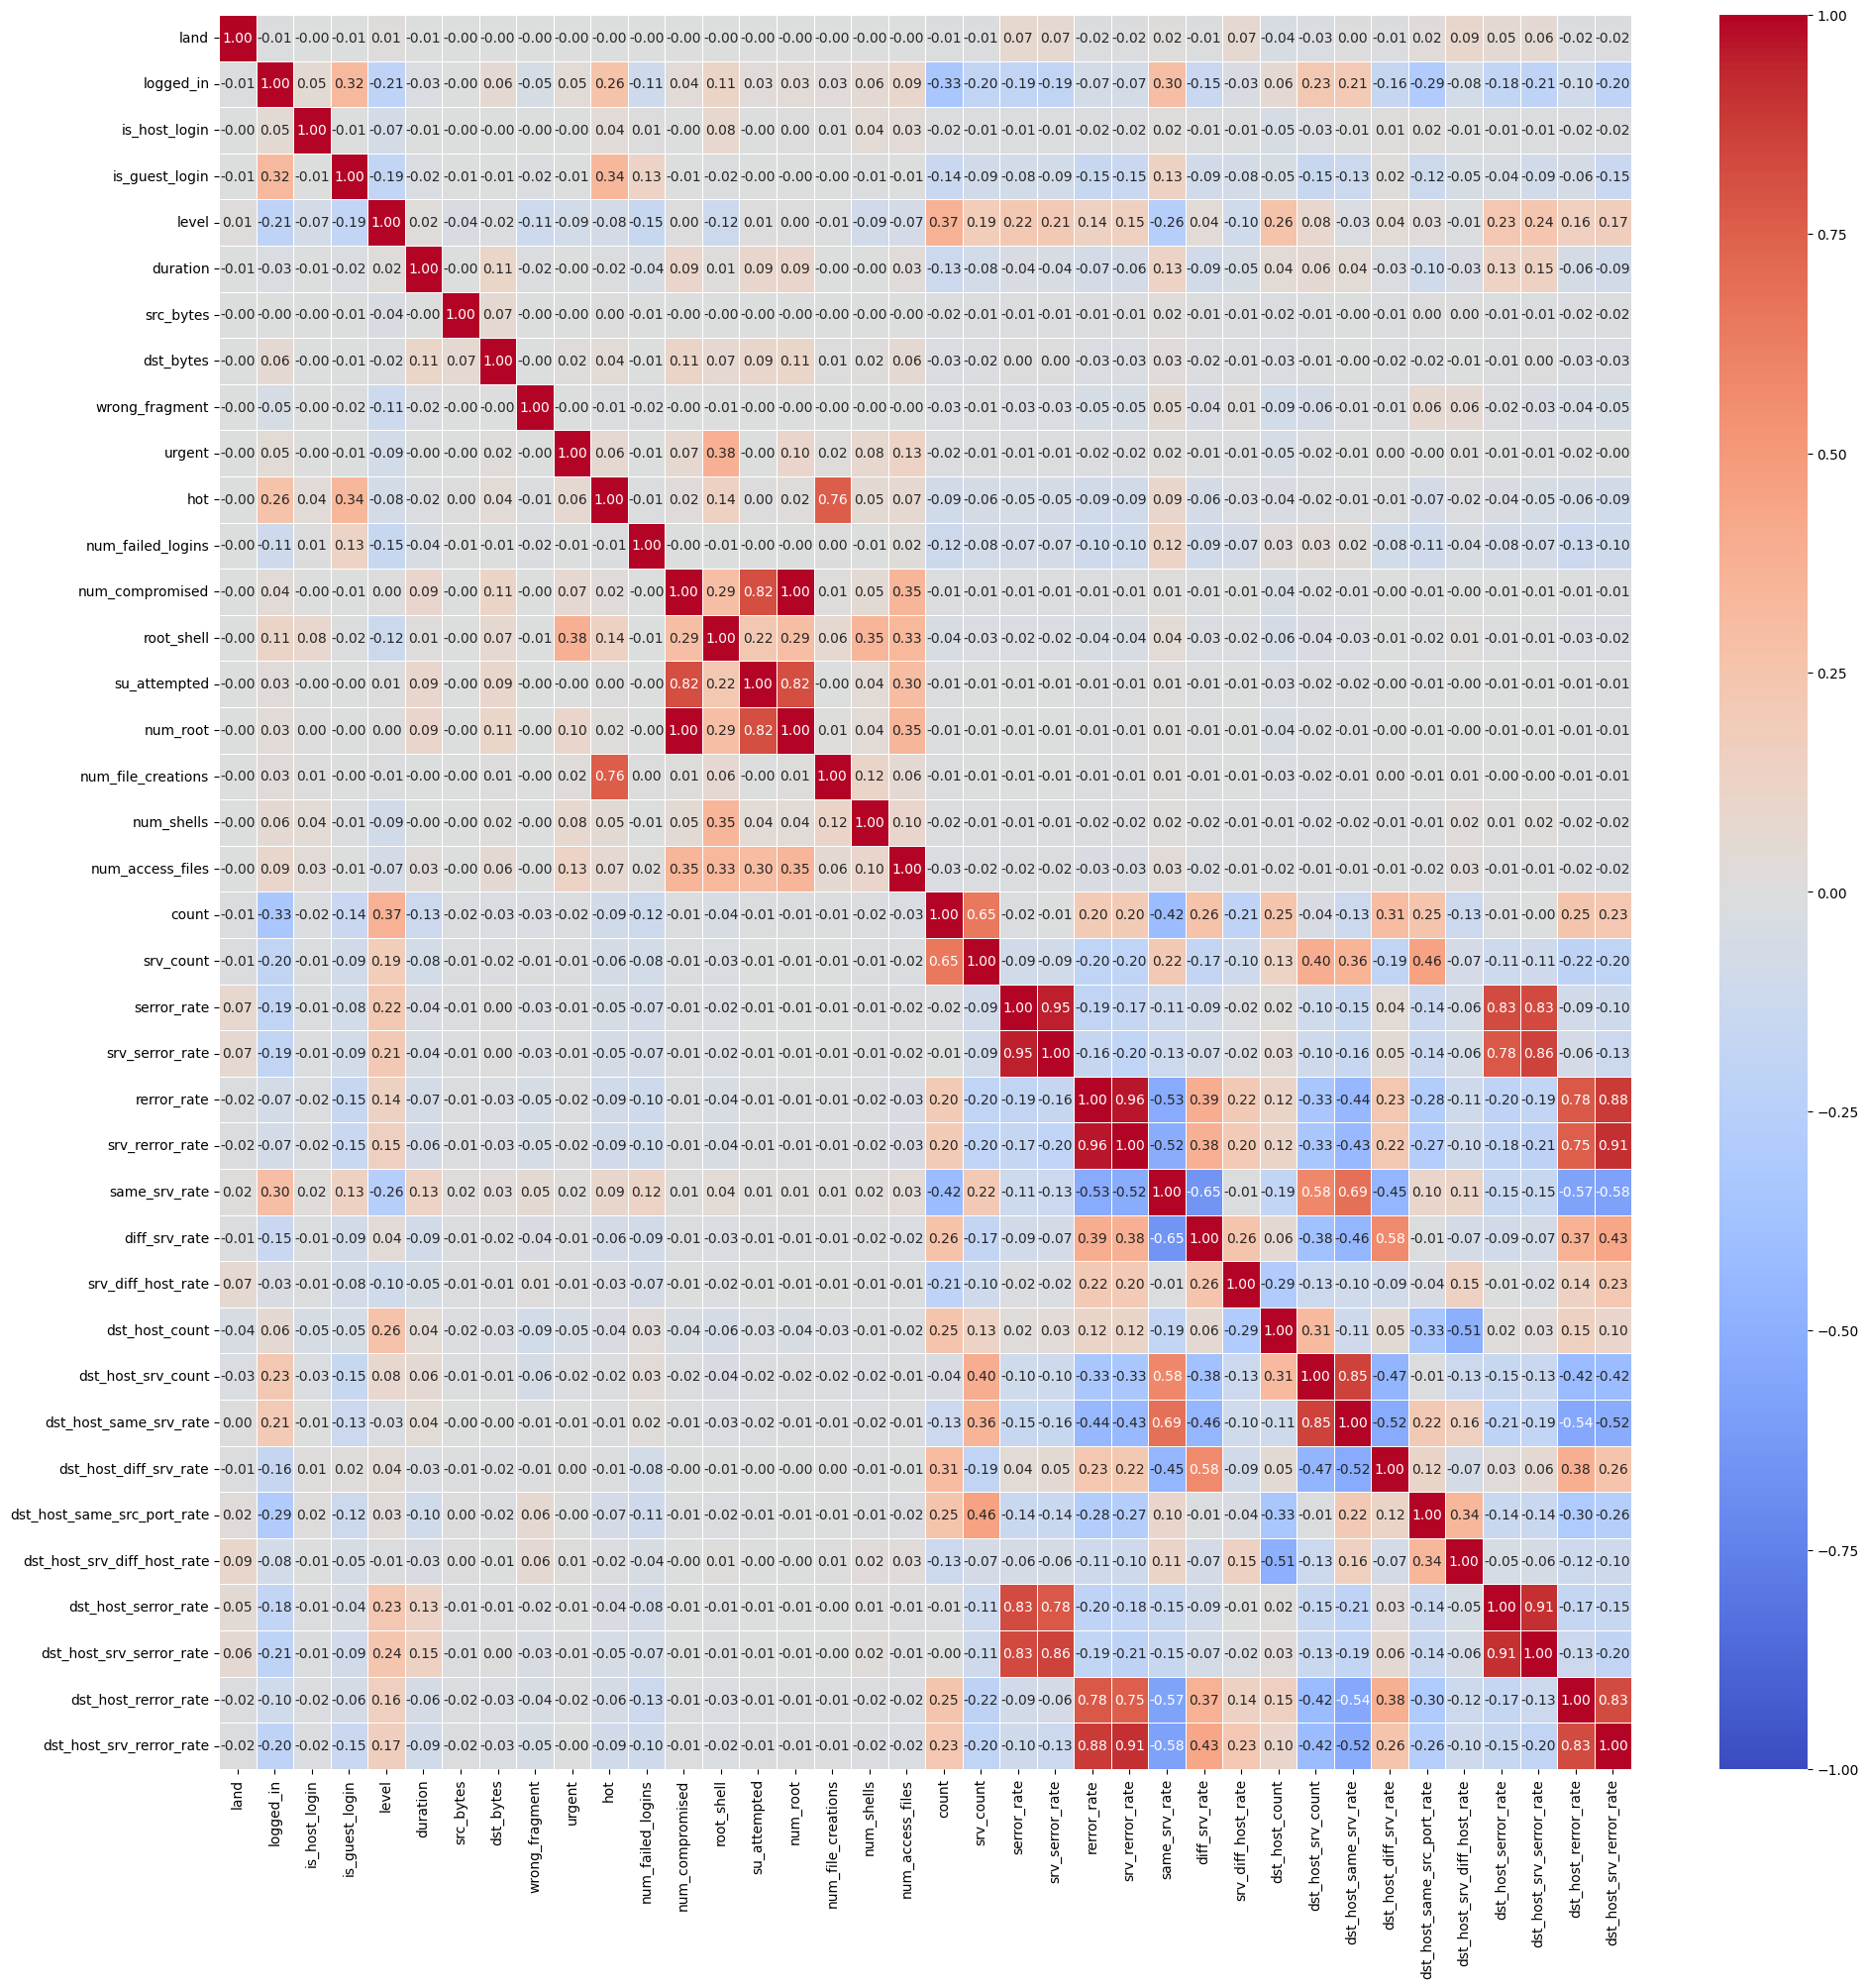

In [43]:
df = data_train.dropna(axis=1)
# Keep columns where there are more than 1 unique value
df = df[[col for col in df if df[col].nunique() > 1]]
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(23, 23))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.show()

# Principal Component Analysis

In [44]:
from sklearn.preprocessing import LabelEncoder

# Assuming data_train is your original DataFrame
data_train_Dt_reduction = data_train[['is_guest_login', 'logged_in', 'srv_diff_host_rate', 'level', 'service', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'num_shells']]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
data_train_Dt_reduction['service'] = label_encoder.fit_transform(data_train_Dt_reduction['service'])

In [45]:
data_train_Dt_reduction.shape

(11849, 8)

In [46]:
x = scaled_train.drop('outcome' , axis = 1).values
y = scaled_train['outcome'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))
print(data_train_Dt_reduction.shape)
print(x_reduced.shape)

Number of original features is 115 and of reduced features is 20
(11849, 8)
(11849, 20)


Information about columns selected by PCA

In [47]:
# Get the loading matrix
loading_matrix = pca.components_

# Create a DataFrame for better visualization
features = scaled_train.drop('outcome', axis=1).columns
loading_df = pd.DataFrame(loading_matrix.T, index=features, columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

# Sum the absolute values of the loadings for each feature across all principal components
loading_sums = loading_df.abs().sum(axis=1)

# Sort the features by their aggregated influence and select the top 20
top_20_features = loading_sums.sort_values(ascending=False).head(20)

print("Top 20 contributing features across all principal components:")
print(top_20_features)

Top 20 contributing features across all principal components:
count                          2.477784
num_file_creations             2.368903
dst_host_diff_srv_rate         2.243899
dst_host_same_src_port_rate    2.142721
diff_srv_rate                  2.134617
hot                            2.117981
srv_count                      2.051350
same_srv_rate                  1.998598
num_compromised                1.903207
num_root                       1.858554
logged_in                      1.684613
dst_host_srv_rerror_rate       1.681260
level                          1.589309
dst_host_rerror_rate           1.518385
protocol_type_udp              1.360299
srv_rerror_rate                1.353104
dst_host_srv_count             1.313439
dst_host_same_srv_rate         1.296475
flag_SF                        1.233712
protocol_type_tcp              1.211470
dtype: float64


# Data Splitting

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming y contains the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(data_train_Dt_reduction, y_encoded, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y_encoded, test_size=0.2, random_state=42)


# Classification Method

In [49]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

kernal_evals = dict()

def evaluate_classification(model, model_name, X_train, X_test, y_train, y_test):
    # Record the start time for training
    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()

    # Calculate training time
    train_time = end_train_time - start_train_time

    # Record the start time for testing
    start_test_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end_test_time = time.time()

    # Calculate testing time
    test_time = end_test_time - start_test_time

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')

    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')

    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    kernal_evals[str(model_name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_time, test_time]

    print(f"{model_name} - Training accuracy: {train_accuracy:.4f}")
    print(f"{model_name} - Test accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Training precision: {train_precision:.4f}")
    print(f"{model_name} - Test precision: {test_precision:.4f}")
    print(f"{model_name} - Training recall: {train_recall:.4f}")
    print(f"{model_name} - Test recall: {test_recall:.4f}")
    print(f"{model_name} - Training F1 score: {train_f1:.4f}")
    print(f"{model_name} - Test F1 score: {test_f1:.4f}")
    print(f"{model_name} - Training time: {train_time:.4f} seconds")
    print(f"{model_name} - Testing time: {test_time:.4f} seconds")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    disp.plot(ax=ax)
    plt.show()

# Classification outcome column (Using Decision Tress Columns)

Note: X ==> 8 Columns Selected by DT  &&  Y ==> outcome Column

Logistic Regression

LR with Features DT - Training accuracy: 0.5784
LR with Features DT - Test accuracy: 0.5751
LR with Features DT - Training precision: 0.5798
LR with Features DT - Test precision: 0.5795
LR with Features DT - Training recall: 0.5784
LR with Features DT - Test recall: 0.5751
LR with Features DT - Training F1 score: 0.5729
LR with Features DT - Test F1 score: 0.5700
LR with Features DT - Training time: 167.8619 seconds
LR with Features DT - Testing time: 0.0206 seconds


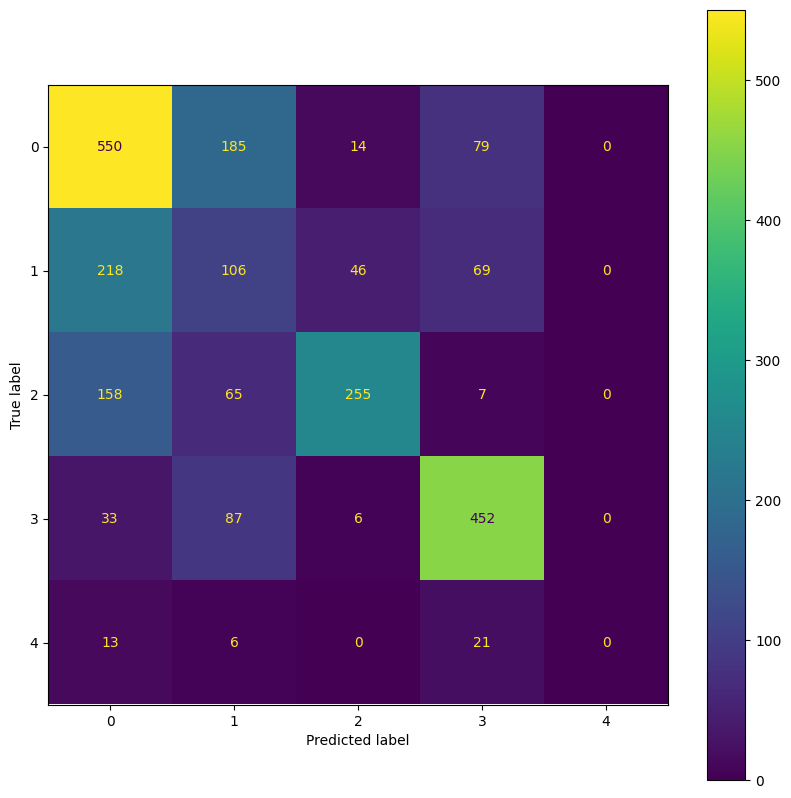

-----------------------------------------------------------------------------------------------------------------------------
LR with PCA Features - Training accuracy: 0.6210
LR with PCA Features - Test accuracy: 0.6025
LR with PCA Features - Training precision: 0.6100
LR with PCA Features - Test precision: 0.6028
LR with PCA Features - Training recall: 0.6210
LR with PCA Features - Test recall: 0.6025
LR with PCA Features - Training F1 score: 0.5882
LR with PCA Features - Test F1 score: 0.5725
LR with PCA Features - Training time: 5.5754 seconds
LR with PCA Features - Testing time: 0.0060 seconds


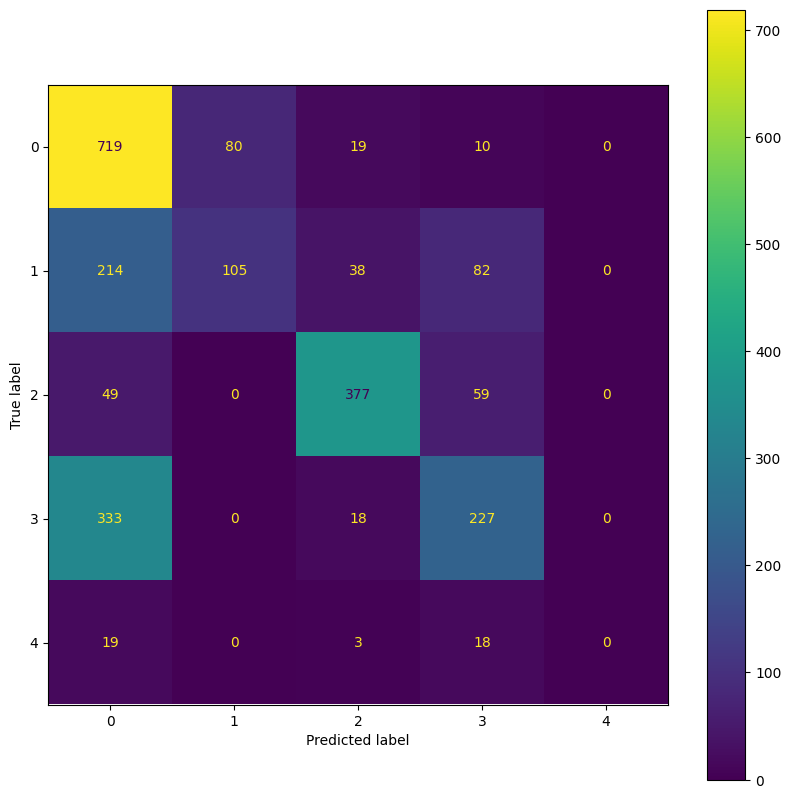

In [50]:
from sklearn.linear_model import LogisticRegression

# Fit and evaluate Logistic Regression model using manually selected features
lr_manual = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr_manual, "LR with Features DT", x_train, x_test, y_train, y_test)
print('-----------------------------------------------------------------------------------------------------------------------------')
# Fit and evaluate Logistic Regression model using PCA selected features
lr_pca = LogisticRegression().fit(x_train_reduced, y_train_reduced)
evaluate_classification(lr_pca, "LR with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


k-nearest neighbors

KNN with Features DT - Training accuracy: 0.9652
KNN with Features DT - Test accuracy: 0.9599
KNN with Features DT - Training precision: 0.9653
KNN with Features DT - Test precision: 0.9600
KNN with Features DT - Training recall: 0.9652
KNN with Features DT - Test recall: 0.9599
KNN with Features DT - Training F1 score: 0.9651
KNN with Features DT - Test F1 score: 0.9598
KNN with Features DT - Training time: 0.0842 seconds
KNN with Features DT - Testing time: 1.6145 seconds


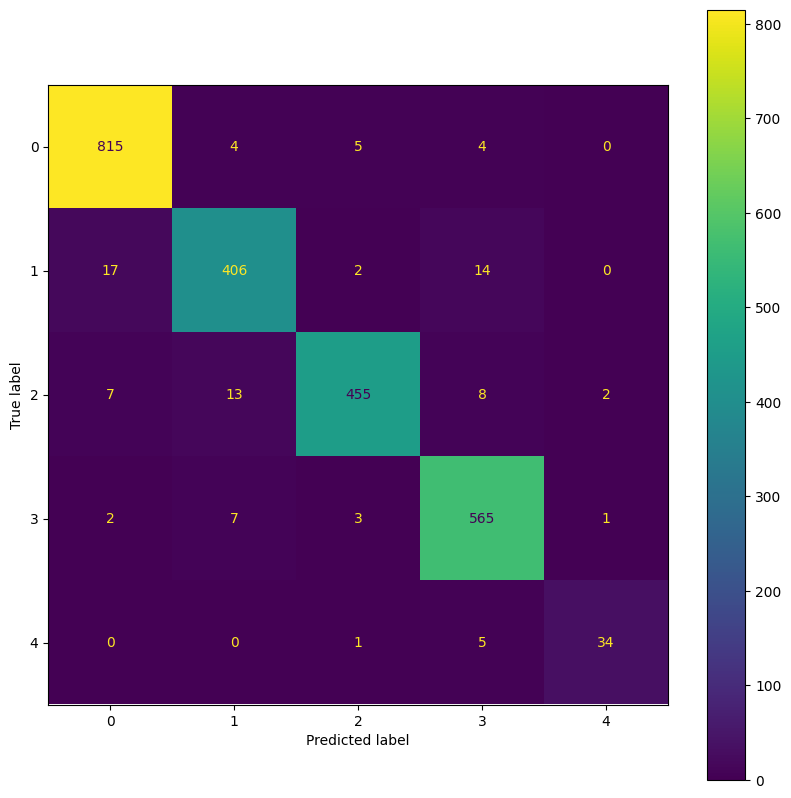

-----------------------------------------------------------------------------------------------------------------------------
KNN with PCA Features - Training accuracy: 0.9704
KNN with PCA Features - Test accuracy: 0.9662
KNN with PCA Features - Training precision: 0.9699
KNN with PCA Features - Test precision: 0.9658
KNN with PCA Features - Training recall: 0.9704
KNN with PCA Features - Test recall: 0.9662
KNN with PCA Features - Training F1 score: 0.9698
KNN with PCA Features - Test F1 score: 0.9657
KNN with PCA Features - Training time: 0.0030 seconds
KNN with PCA Features - Testing time: 0.9997 seconds


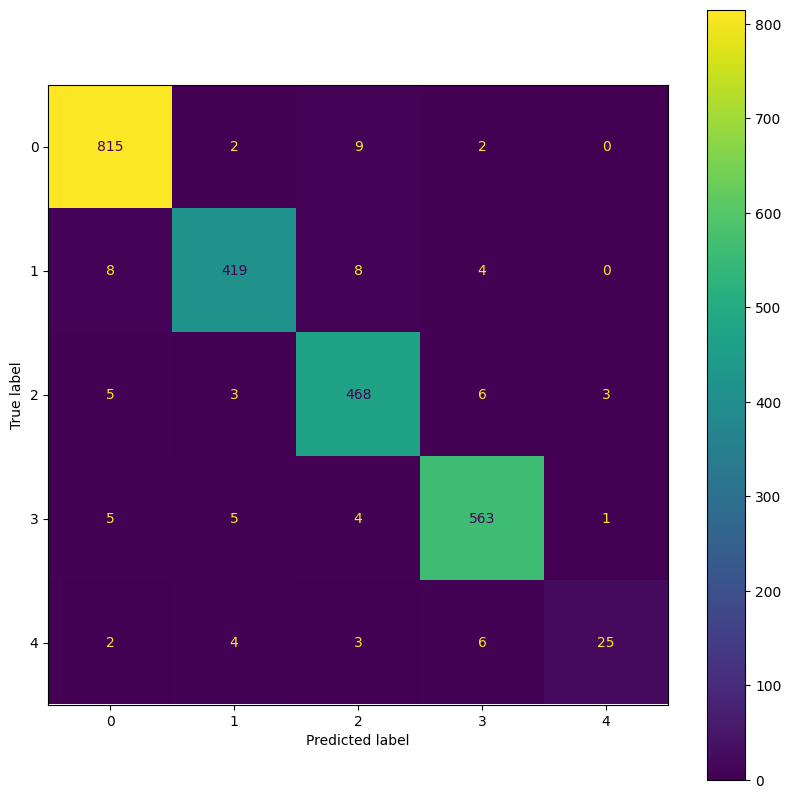

In [51]:
# Fit and evaluate KNN model using manually selected features
knn_manual = KNeighborsClassifier().fit(x_train, y_train)
evaluate_classification(knn_manual, "KNN with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate KNN model using PCA selected features
knn_pca = KNeighborsClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(knn_pca, "KNN with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


Naive Bayes

NB with Features DT - Training accuracy: 0.5308
NB with Features DT - Test accuracy: 0.5186
NB with Features DT - Training precision: 0.5572
NB with Features DT - Test precision: 0.5661
NB with Features DT - Training recall: 0.5308
NB with Features DT - Test recall: 0.5186
NB with Features DT - Training F1 score: 0.4493
NB with Features DT - Test F1 score: 0.4399
NB with Features DT - Training time: 0.0150 seconds
NB with Features DT - Testing time: 0.0171 seconds


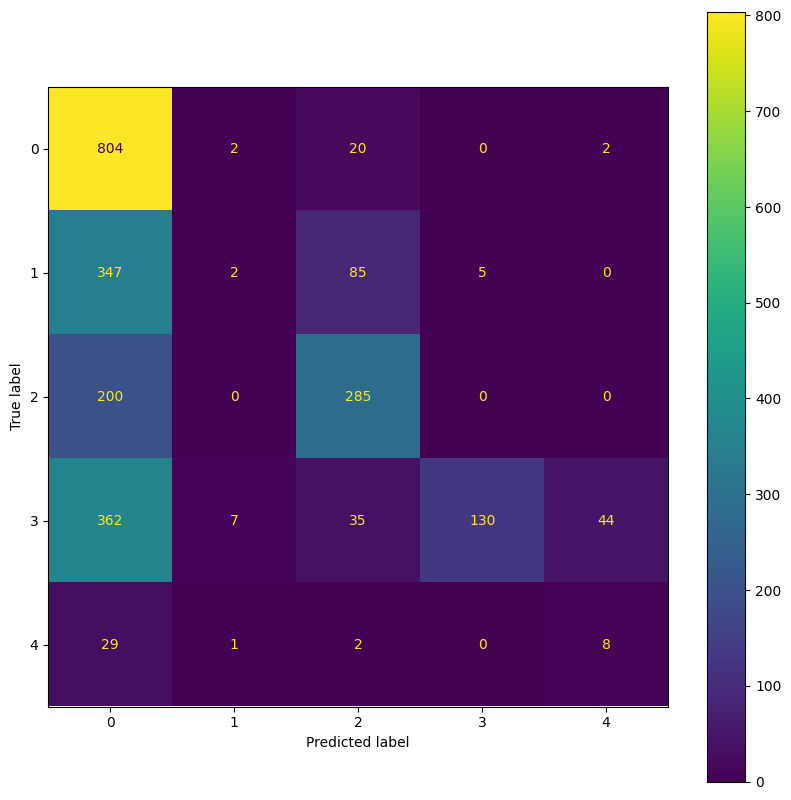

-----------------------------------------------------------------------------------------------------------------------------
NB with PCA Features - Training accuracy: 0.4337
NB with PCA Features - Test accuracy: 0.4245
NB with PCA Features - Training precision: 0.5143
NB with PCA Features - Test precision: 0.4864
NB with PCA Features - Training recall: 0.4337
NB with PCA Features - Test recall: 0.4245
NB with PCA Features - Training F1 score: 0.3949
NB with PCA Features - Test F1 score: 0.3809
NB with PCA Features - Training time: 0.0130 seconds
NB with PCA Features - Testing time: 0.0329 seconds


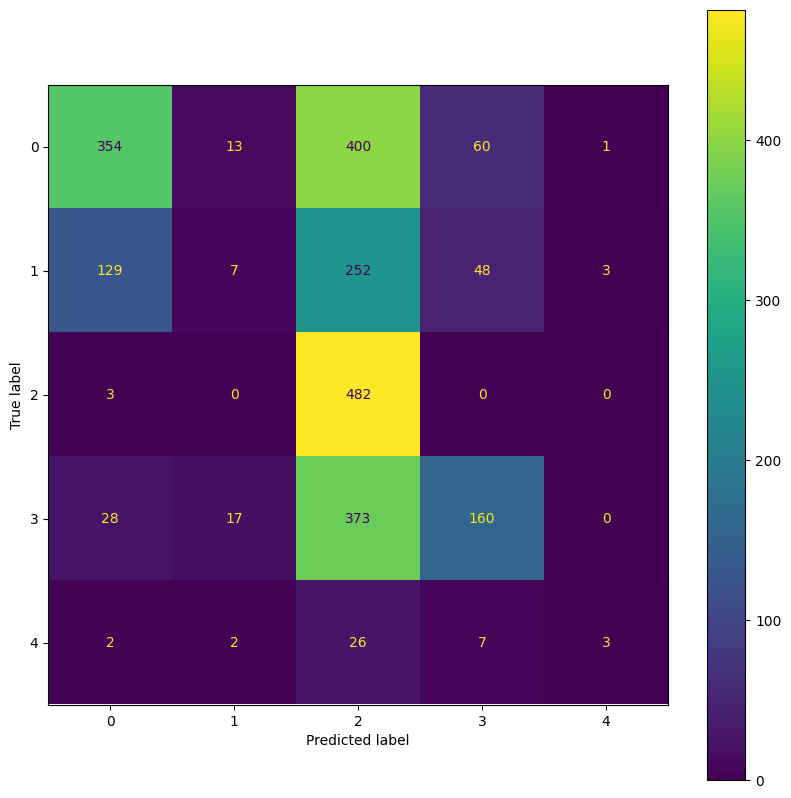

In [52]:
# Fit and evaluate Naiive Bayes model using manually selected features
gnb_manual = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb_manual, "NB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate Naiive Bayes model using PCA selected features
gnb_pca = GaussianNB().fit(x_train_reduced, y_train_reduced)
evaluate_classification(gnb_pca, "NB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Support Vector Machines

SVM with Features DT - Training accuracy: 0.6134
SVM with Features DT - Test accuracy: 0.6059
SVM with Features DT - Training precision: 0.5311
SVM with Features DT - Test precision: 0.5391
SVM with Features DT - Training recall: 0.6134
SVM with Features DT - Test recall: 0.6059
SVM with Features DT - Training F1 score: 0.5544
SVM with Features DT - Test F1 score: 0.5480
SVM with Features DT - Training time: 0.2722 seconds
SVM with Features DT - Testing time: 0.0110 seconds


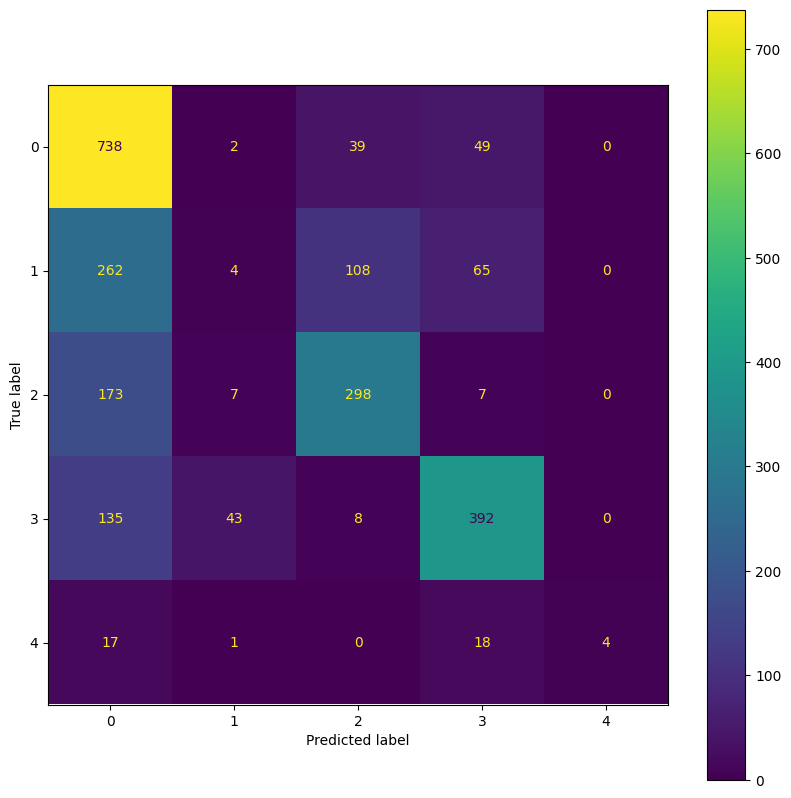

-----------------------------------------------------------------------------------------------------------------------------
SVM with PCA Features - Training accuracy: 0.8422
SVM with PCA Features - Test accuracy: 0.8405
SVM with PCA Features - Training precision: 0.8412
SVM with PCA Features - Test precision: 0.8394
SVM with PCA Features - Training recall: 0.8422
SVM with PCA Features - Test recall: 0.8405
SVM with PCA Features - Training F1 score: 0.8399
SVM with PCA Features - Test F1 score: 0.8387
SVM with PCA Features - Training time: 5.2071 seconds
SVM with PCA Features - Testing time: 0.0030 seconds


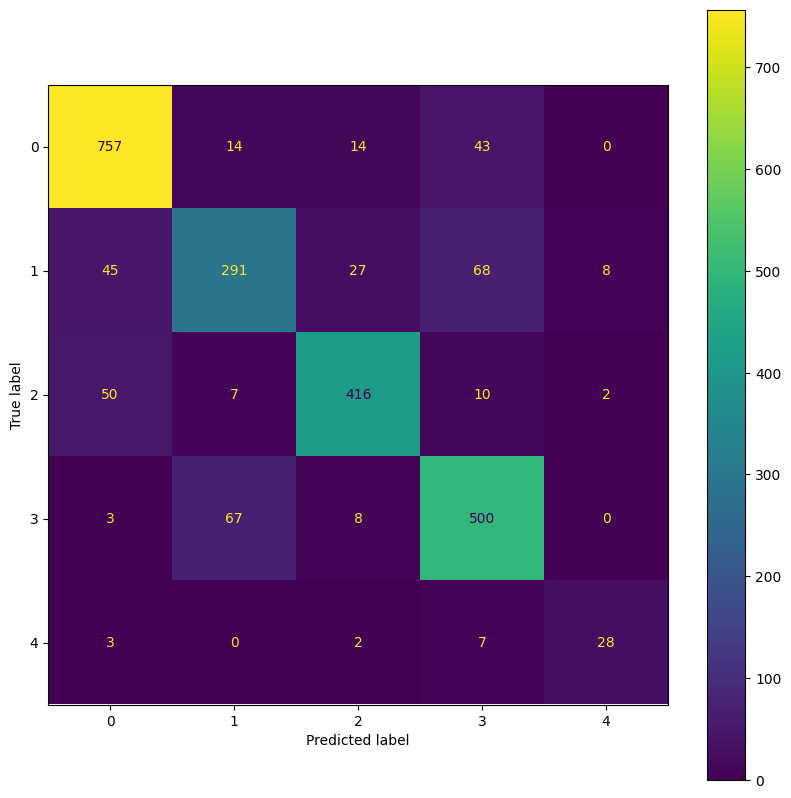

In [53]:
# Fit and evaluate SVM model using manually selected features
svc_manual = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(svc_manual, "SVM with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate SVM model using PCA selected features
svc_pca = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
evaluate_classification(svc_pca, "SVM with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Decision Tree

DT with Features DT - Training accuracy: 0.9893
DT with Features DT - Test accuracy: 0.9654
DT with Features DT - Training precision: 0.9894
DT with Features DT - Test precision: 0.9656
DT with Features DT - Training recall: 0.9893
DT with Features DT - Test recall: 0.9654
DT with Features DT - Training F1 score: 0.9893
DT with Features DT - Test F1 score: 0.9655
DT with Features DT - Training time: 0.0280 seconds
DT with Features DT - Testing time: 0.0090 seconds


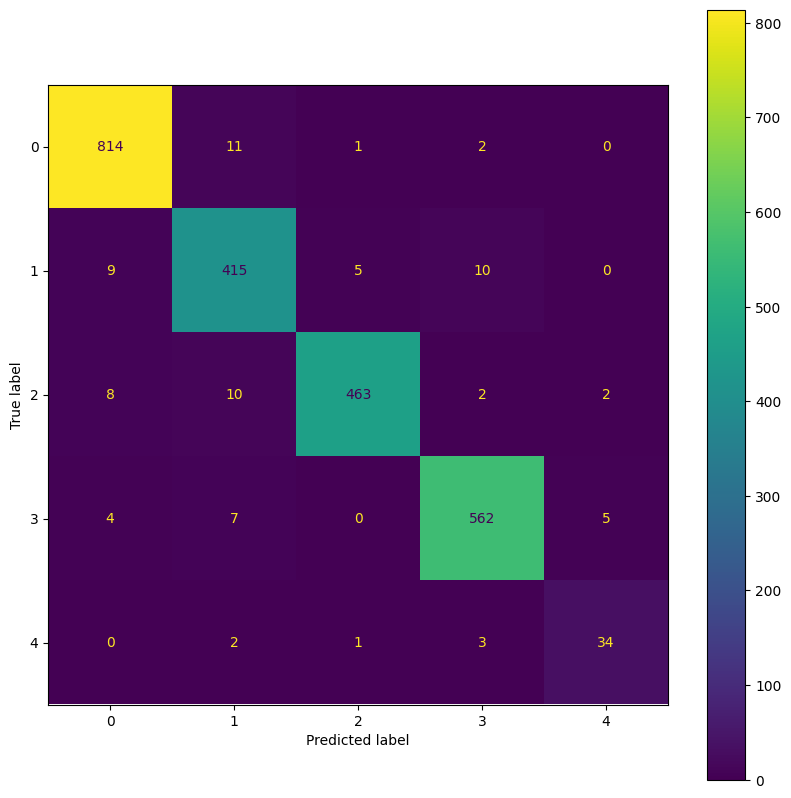

-----------------------------------------------------------------------------------------------------------------------------
DT with PCA Features - Training accuracy: 1.0000
DT with PCA Features - Test accuracy: 0.9709
DT with PCA Features - Training precision: 1.0000
DT with PCA Features - Test precision: 0.9710
DT with PCA Features - Training recall: 1.0000
DT with PCA Features - Test recall: 0.9709
DT with PCA Features - Training F1 score: 1.0000
DT with PCA Features - Test F1 score: 0.9709
DT with PCA Features - Training time: 0.8525 seconds
DT with PCA Features - Testing time: 0.0040 seconds


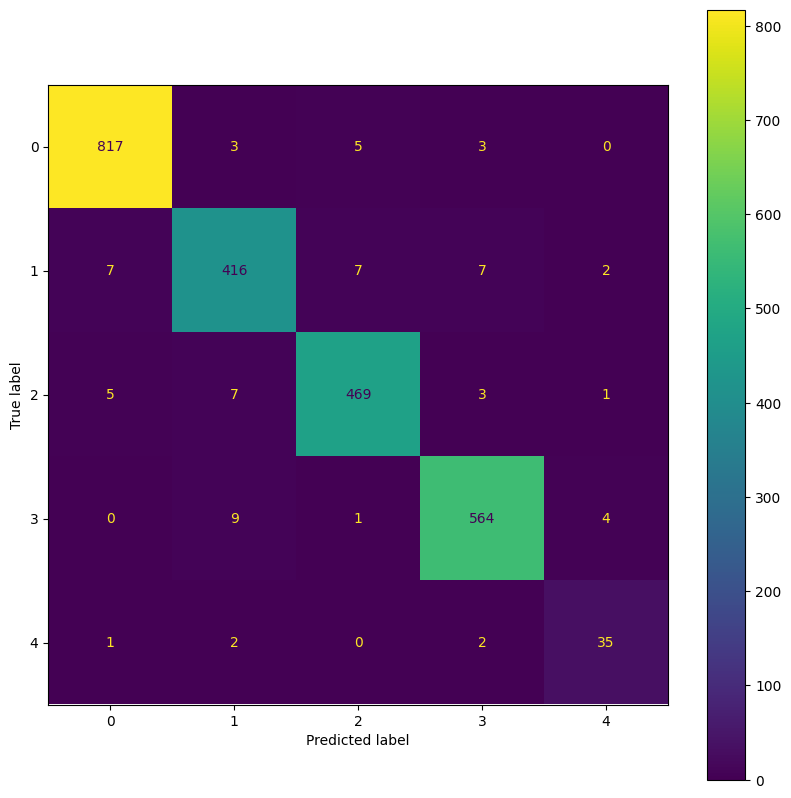

In [54]:
# Fit and evaluate DT model using manually selected features
dt_manual = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(dt_manual, "DT with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate DT model using PCA selected features
dt_pca = DecisionTreeClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(dt_pca, "DT with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Random forest

RF with Features DT - Training accuracy: 0.9892
RF with Features DT - Test accuracy: 0.9722
RF with Features DT - Training precision: 0.9893
RF with Features DT - Test precision: 0.9721
RF with Features DT - Training recall: 0.9892
RF with Features DT - Test recall: 0.9722
RF with Features DT - Training F1 score: 0.9892
RF with Features DT - Test F1 score: 0.9721
RF with Features DT - Training time: 1.1939 seconds
RF with Features DT - Testing time: 0.2840 seconds


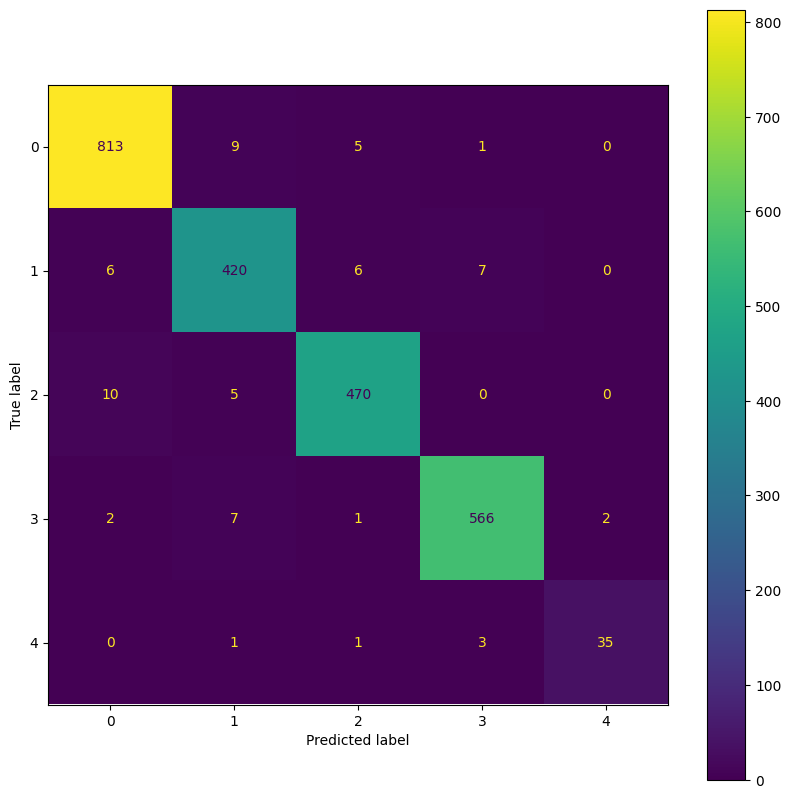

-----------------------------------------------------------------------------------------------------------------------------
RF with PCA Features - Training accuracy: 1.0000
RF with PCA Features - Test accuracy: 0.9899
RF with PCA Features - Training precision: 1.0000
RF with PCA Features - Test precision: 0.9899
RF with PCA Features - Training recall: 1.0000
RF with PCA Features - Test recall: 0.9899
RF with PCA Features - Training F1 score: 1.0000
RF with PCA Features - Test F1 score: 0.9899
RF with PCA Features - Training time: 8.3693 seconds
RF with PCA Features - Testing time: 0.2344 seconds


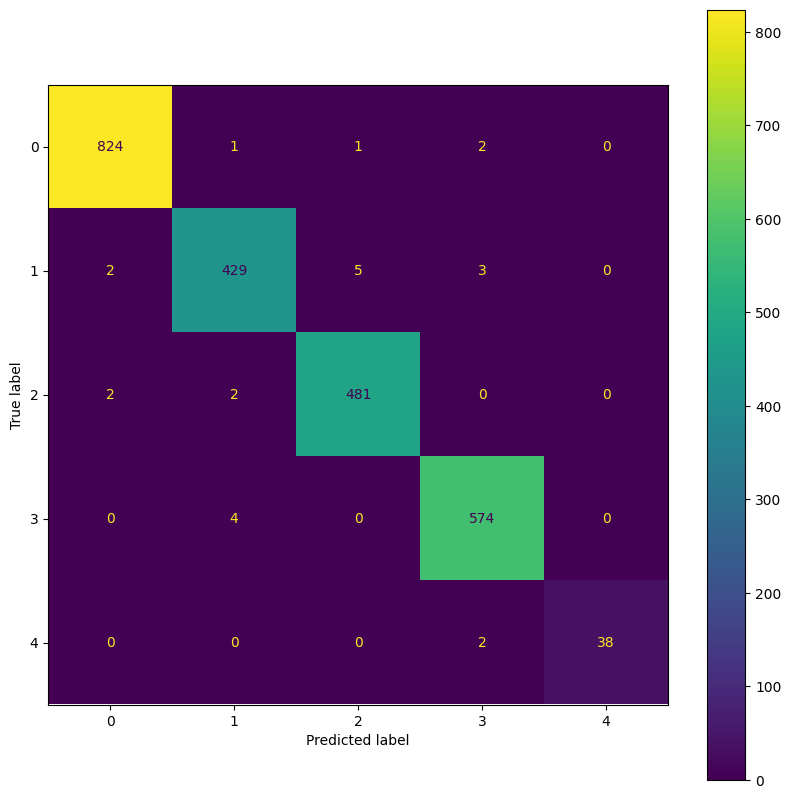

In [55]:
# Fit and evaluate RF model using manually selected features
rf_manual = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf_manual, "RF with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate RF model using PCA selected features
rf_pca = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rf_pca, "RF with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Handle 100% Accurracy in PCA Features in Random Forest

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Adjusted): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
RF with PCA Features with Final Params - Training accuracy: 0.9994
RF with PCA Features with Final Params - Test accuracy: 0.9882
RF with PCA Features with Final Params - Training precision: 0.9994
RF with PCA Features with Final Params - Test precision: 0.9882
RF with PCA Features with Final Params - Training recall: 0.9994
RF with PCA Features with Final Params - Test recall: 0.9882
RF with PCA Features with Final Params - Training F1 score: 0.9994
RF with PCA Features with Final Params - Test F1 score: 0.9881
RF with PCA Features with Final Params - Training time: 8.1370 seconds
RF with PCA Features with Final Params - Testing time: 0.2324 seconds


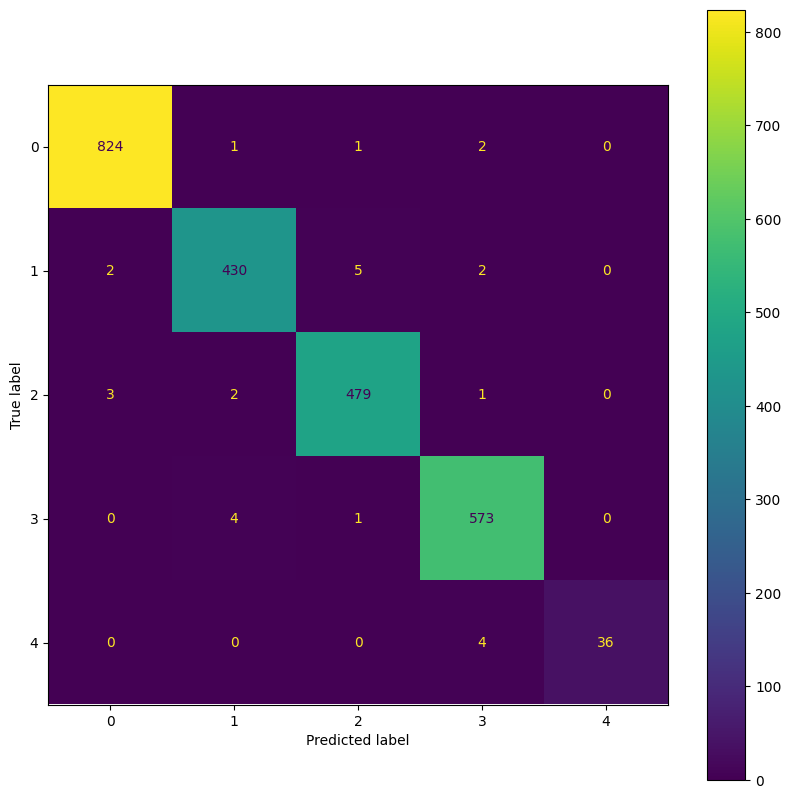

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Adjusted parameter grid for further tuning
param_dist_adjusted = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf_adjusted = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the adjusted parameters
random_search_adjusted = RandomizedSearchCV(estimator=rf_adjusted, param_distributions=param_dist_adjusted, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search_adjusted.fit(x_train_reduced, y_train_reduced)

# Get the best parameters
best_params_adjusted = random_search_adjusted.best_params_
print(f"Best parameters (Adjusted): {best_params_adjusted}")

# Train the Random Forest with the adjusted best parameters
rf_best_adjusted = RandomForestClassifier(**best_params_adjusted, random_state=42)
rf_best_adjusted.fit(x_train_reduced, y_train_reduced)

# Evaluate the tuned model
evaluate_classification(rf_best_adjusted, "RF with PCA Features with Final Params", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

XGBoost

XGB with Features DT - Training accuracy: 0.9733
XGB with Features DT - Test accuracy: 0.9641
XGB with Features DT - Training precision: 0.9733
XGB with Features DT - Test precision: 0.9642
XGB with Features DT - Training recall: 0.9733
XGB with Features DT - Test recall: 0.9641
XGB with Features DT - Training F1 score: 0.9732
XGB with Features DT - Test F1 score: 0.9639
XGB with Features DT - Training time: 0.2705 seconds
XGB with Features DT - Testing time: 0.0409 seconds


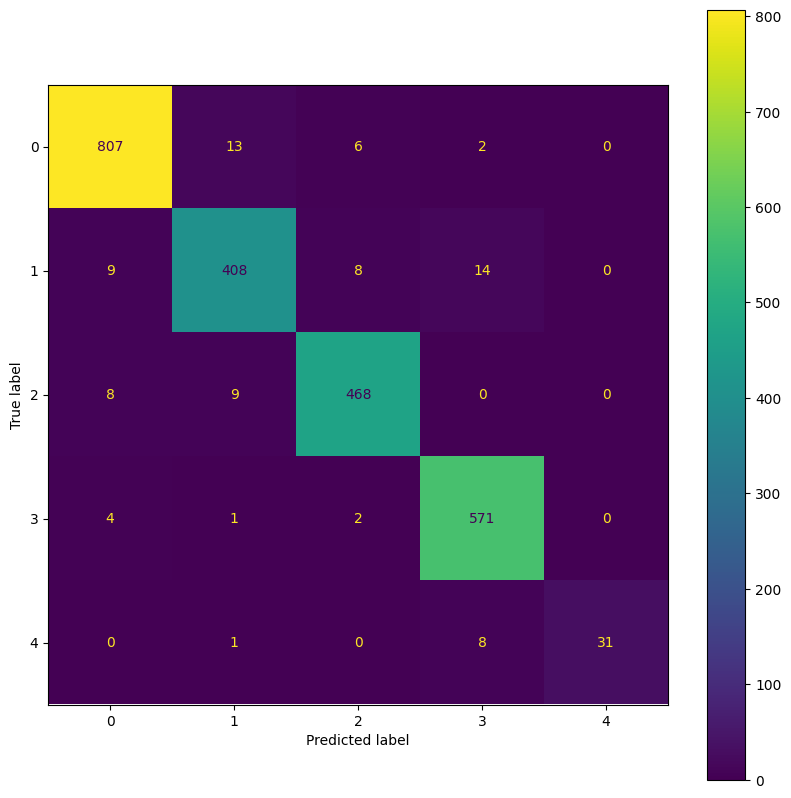

-----------------------------------------------------------------------------------------------------------------------------
XGB with PCA Features - Training accuracy: 0.9996
XGB with PCA Features - Test accuracy: 0.9911
XGB with PCA Features - Training precision: 0.9996
XGB with PCA Features - Test precision: 0.9912
XGB with PCA Features - Training recall: 0.9996
XGB with PCA Features - Test recall: 0.9911
XGB with PCA Features - Training F1 score: 0.9996
XGB with PCA Features - Test F1 score: 0.9911
XGB with PCA Features - Training time: 0.8412 seconds
XGB with PCA Features - Testing time: 0.0291 seconds


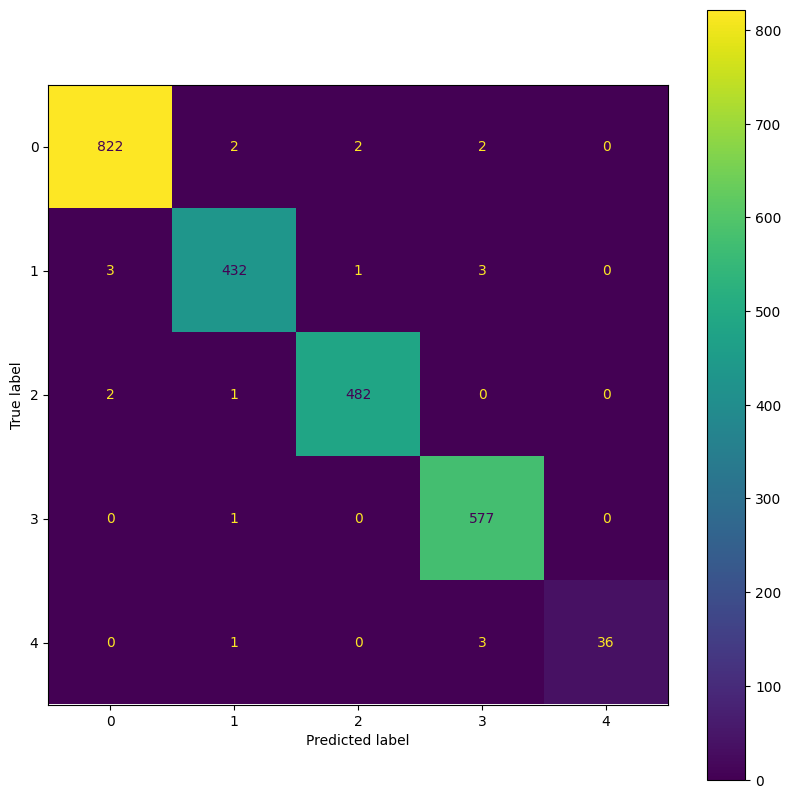

In [57]:
# Fit and evaluate RF model using manually selected features
xg_manual = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train, y_train)
evaluate_classification(xg_manual, "XGB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate RF model using PCA selected features
xg_pca = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train_reduced, y_train_reduced)
evaluate_classification(xg_pca, "XGB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Gradient Boosting Classifier

GB with Features DT - Training accuracy: 0.9602
GB with Features DT - Test accuracy: 0.9557
GB with Features DT - Training precision: 0.9603
GB with Features DT - Test precision: 0.9557
GB with Features DT - Training recall: 0.9602
GB with Features DT - Test recall: 0.9557
GB with Features DT - Training F1 score: 0.9599
GB with Features DT - Test F1 score: 0.9554
GB with Features DT - Training time: 5.7827 seconds
GB with Features DT - Testing time: 0.1975 seconds


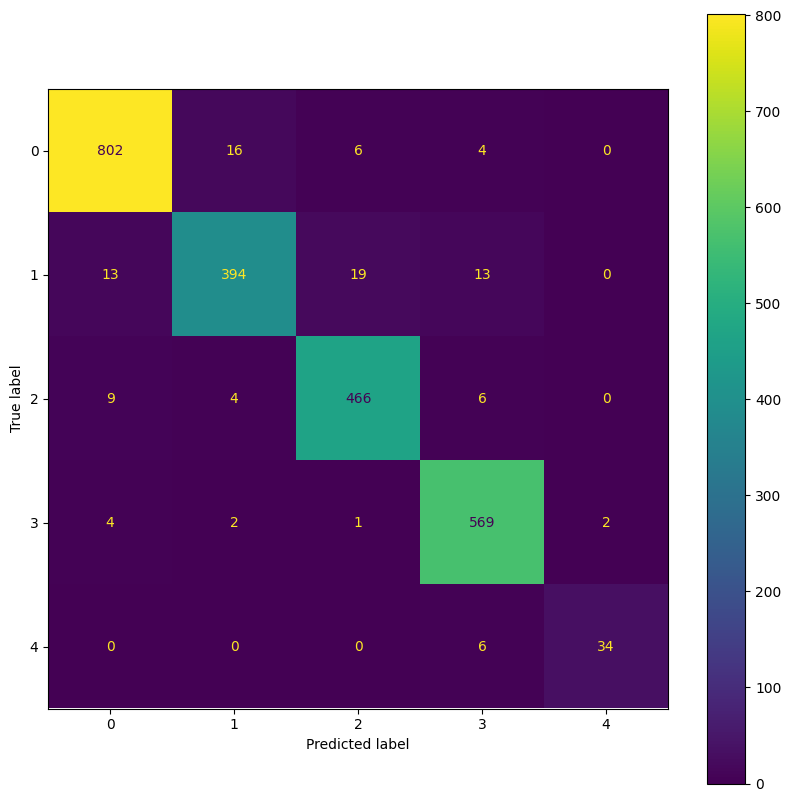

-----------------------------------------------------------------------------------------------------------------------------
GB with PCA Features - Training accuracy: 0.9964
GB with PCA Features - Test accuracy: 0.9835
GB with PCA Features - Training precision: 0.9964
GB with PCA Features - Test precision: 0.9835
GB with PCA Features - Training recall: 0.9964
GB with PCA Features - Test recall: 0.9835
GB with PCA Features - Training F1 score: 0.9964
GB with PCA Features - Test F1 score: 0.9835
GB with PCA Features - Training time: 86.6189 seconds
GB with PCA Features - Testing time: 0.1486 seconds


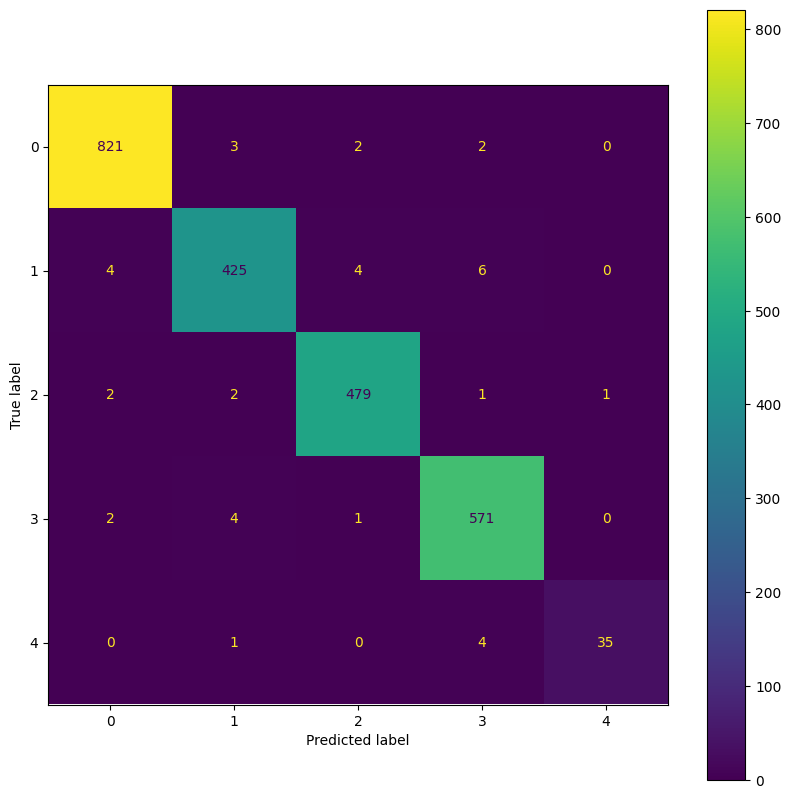

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit and evaluate GB model using manually selected features
gb_manual = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train, y_train)
evaluate_classification(gb_manual, "GB with Features DT", x_train, x_test, y_train, y_test)

print('-----------------------------------------------------------------------------------------------------------------------------')

# Fit and evaluate GB model using PCA selected features
gb_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train_reduced, y_train_reduced)
evaluate_classification(gb_pca, "GB with PCA Features", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# Comparison Between Model

Accuracy

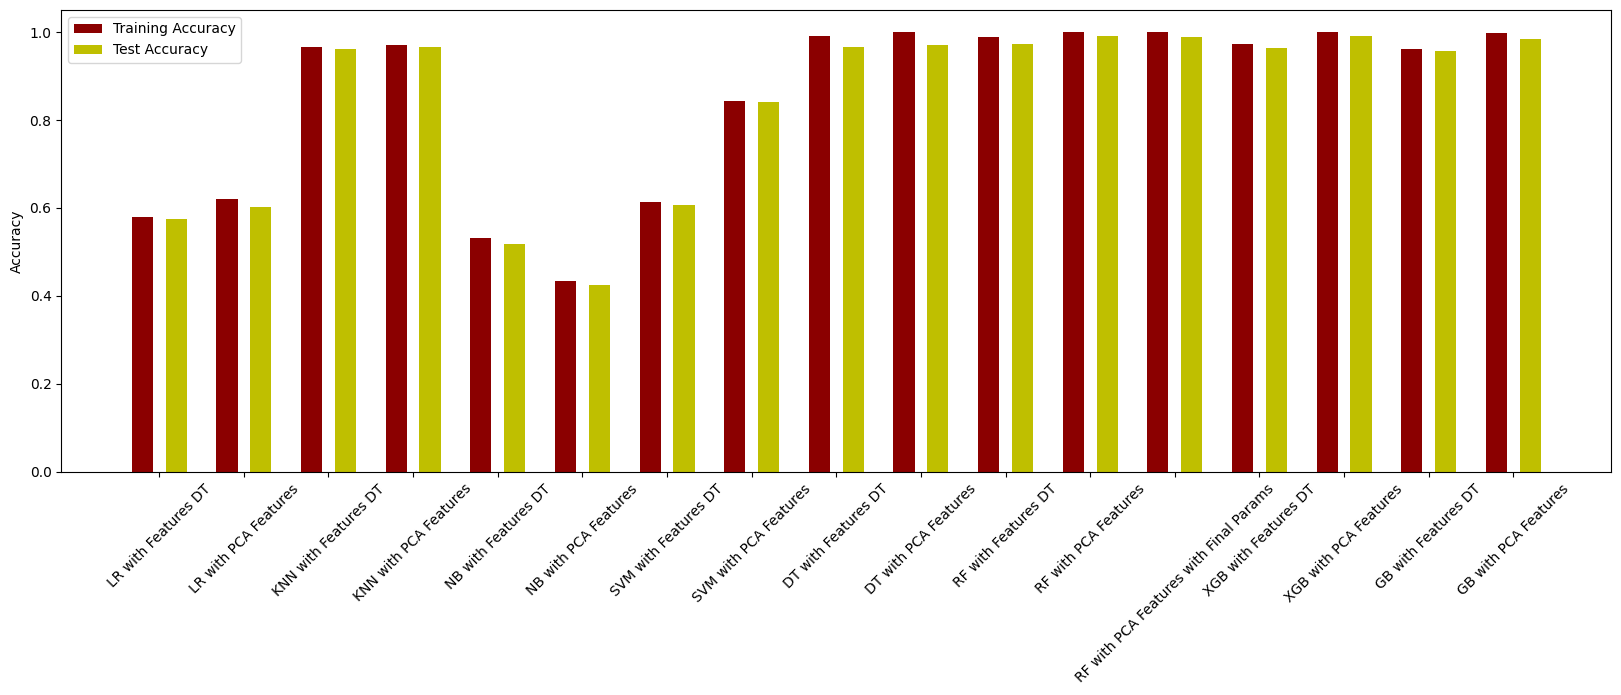

In [59]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

Precesion

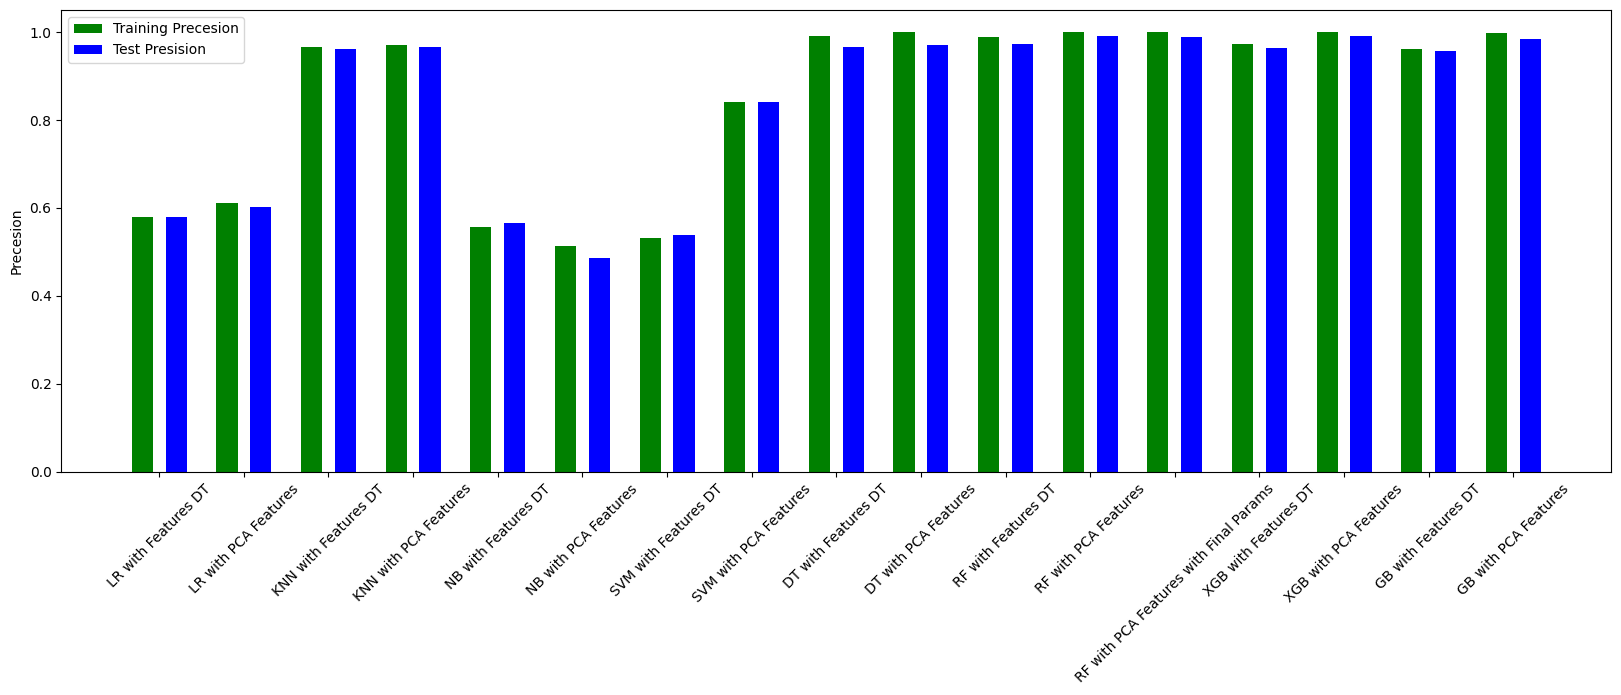

In [60]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.xticks(rotation=45)
plt.show()

Recall

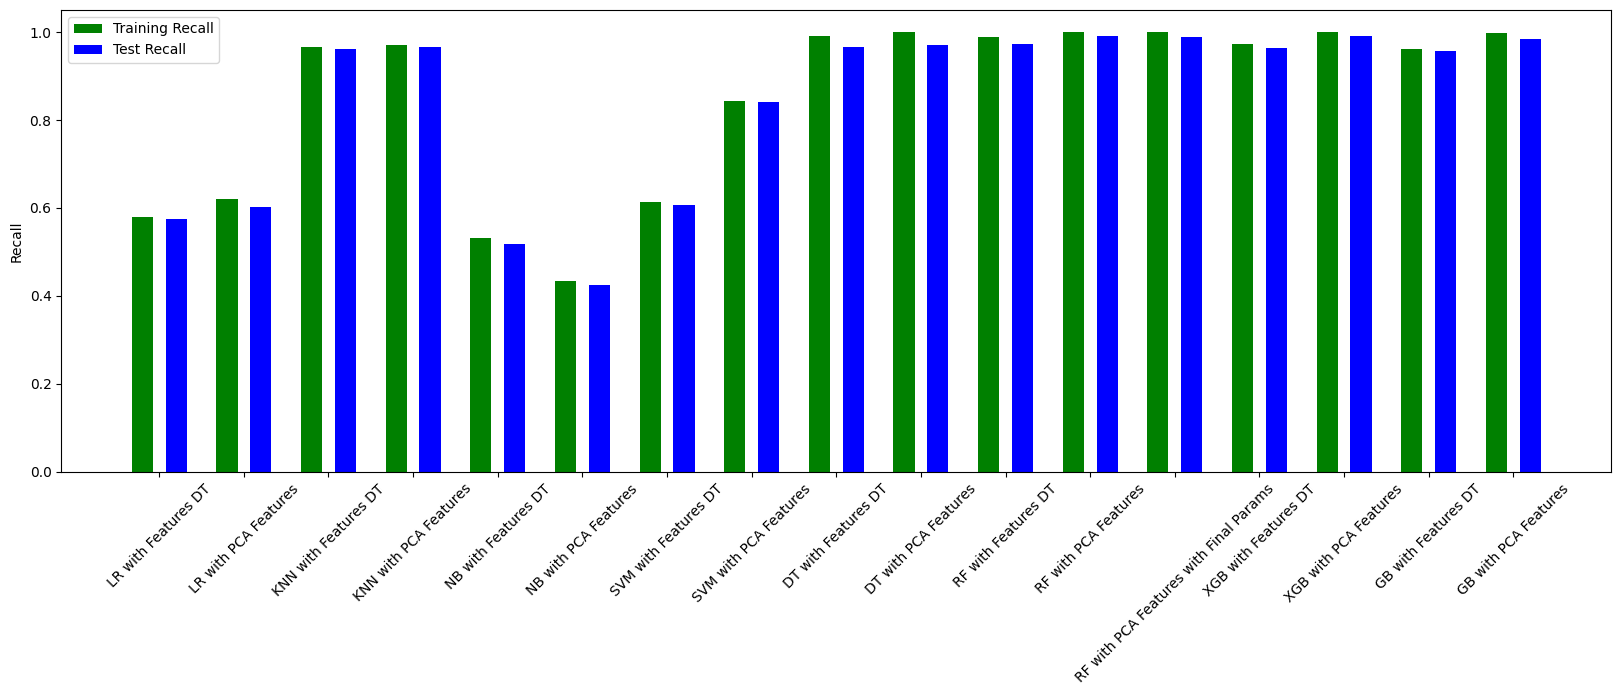

In [61]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.show()

Execution Time

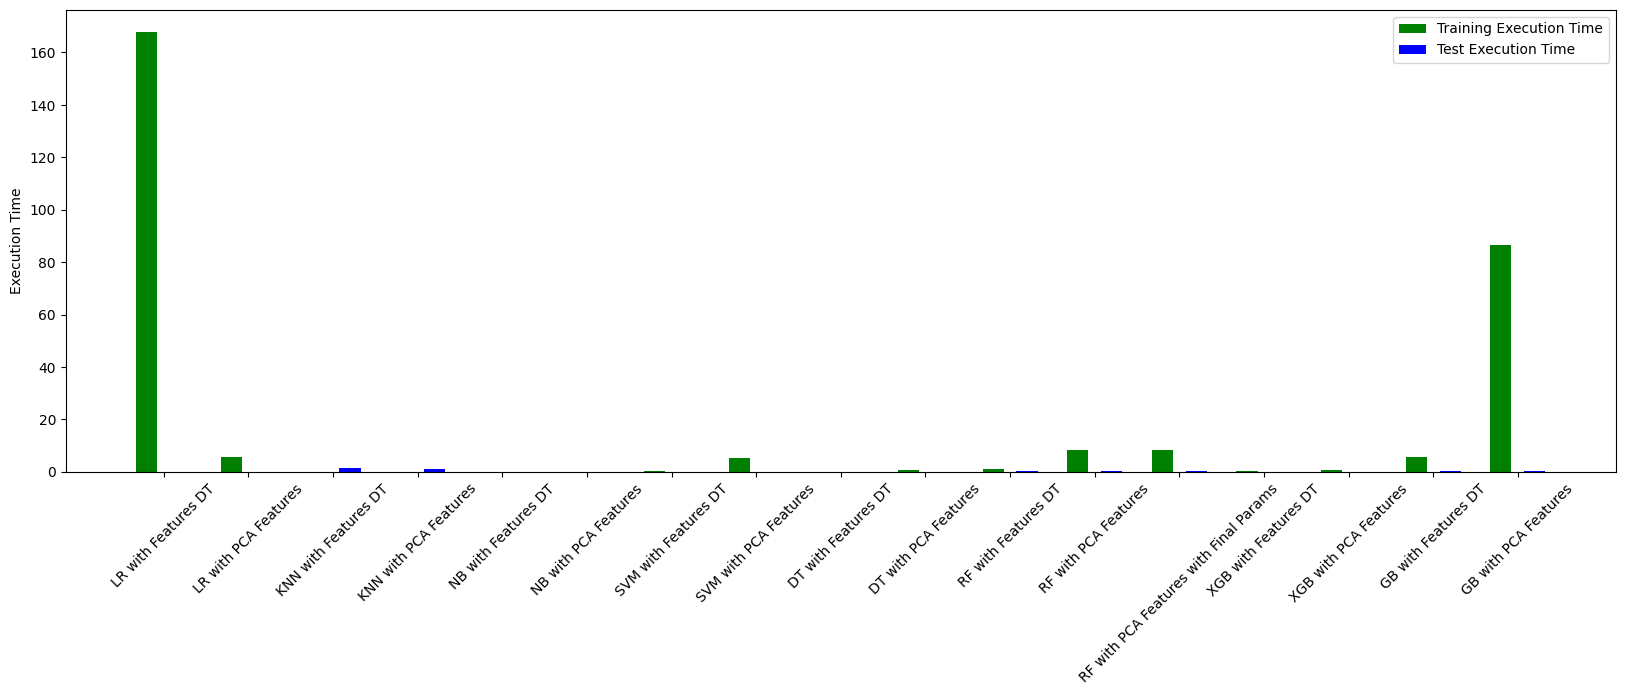

In [62]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[6] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[7] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Execution Time", "Test Execution Time"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Execution Time")
plt.xticks(rotation=45)
plt.show()